# Analyse des données Vélib sur Python

In [284]:
# but du projet avec les données velib :
# repartir de 0 et faire une présentation orale ou l'on doit présenter ce que l'on a fait avec les données
# ce qu'on peut dire du jeu de données
# => analyse exploratoire sur ce qu'on repere sur le comportement des données (stations sur les collines ou hors des collines, dans la semaine et hors semaine
# puis mise en place d'une classification pour dégager des comportemtents différents selon si quartier résidentiel ou de travail, etc
# tirer des conclusions de notre analyse a partir de deux notebook qui doivent avoir la mm table des matieres
# une notebook doit etre bien présenté avec démarche expliquée et commentaires
# l'autre il suffit d'avoir titres et codes

Au cours de ce projet, nous allons nous intéresser à l'étude d'un jeu de données recensant le système de partage de Velibs dans la ville de Paris et leur répartition entre les stations de la région parisienne. Les données se composent de relevés de profils de stations Velibs collectés heure par heure sur une durée d'une semaine, sur la période du lundi 2 septembre au dimanche 7 septembre 2014. Notre objectif sera d'isoler et d'identifier les tendances et les comportements qui se dégagent de ces informations. Pour cela, nous analyserons dans un premier temps les principales caractéristiques de ce jeu de données à l'aide d'une analyse exploratoire descriptive, d'une Analyse en Composante Principale (ACP) puis nous mettrons en place des méthodes de classification afin d'approfondir nos déductions.


Nous commencerons par importer le jeu de données ainsi que les librairies dont nous aurons besoin pour notre analyse.

In [285]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [286]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import random as rd
from scipy.spatial.distance import cdist
import yellowbrick
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from ipywidgets import interact, Dropdown, IntSlider
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer
from ipywidgets import interact, IntSlider
#sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 5)
loading = pd.read_csv("data/velibLoading.csv", sep = " ")
coord = pd.read_csv("data/velibCoord.csv", sep = " ")

# I- Analyse exploratoire des données

Nous avons à notre disposition deux bases de données de 1189 individus chacunes, un individu représentant une station (plus précisément ses coordonnées GPS). Il convient pour commencer d'afficher la forme de nos jeux de données pour se faire une idée plus précise de ce qu'ils contiennent.

In [287]:
coord.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

La base de données coord répertorie les coordonnées des différentes stations parisiennes de notre étude à l'aide de 4 variables : leur nom (variable qualitative), leur position à travers les variables quantitatives longitude, lattitude et  la variable binaire "bonus" indiquant si la station se trouve sur une colline (bonus=1) ou non.






In [288]:
loading.describe(include="number")

Lun-00       Lun-01       Lun-02       Lun-03       Lun-04  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000   
mean      0.401503     0.408770     0.411718     0.415161     0.417136   
std       0.337079     0.335566     0.336132     0.337158     0.332237   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.093750     0.093023     0.096774     0.100000     0.108696   
50%       0.312500     0.333333     0.342857     0.350000     0.357143   
75%       0.694444     0.705882     0.708333     0.710526     0.700000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Lun-05       Lun-06       Lun-07       Lun-08       Lun-09  ...  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000  ...   
mean      0.421650     0.419860     0.415729     0.384658     0.326331  ...   
std       0.326644     0.323422     0.319302     0.303621     0.314026  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.114286     0.114286     0.117647     0.114286     0.047619  ...   
50%       0.363636     0.360000     0.360000     0.320000     0.215385  ...   
75%       0.700000     0.700000     0.687500     0.636364     0.575000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

            Dim-14       Dim-15       Dim-16       Dim-17       Dim-18  \
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000   
mean      0.346147     0.325526     0.311334     0.306399     0.314730   
std       0.340516     0.339897     0.336863     0.331194     0.322904   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.051282     0.041667     0.038462     0.043478     0.052632   
50%       0.204082     0.166667     0.151515     0.142857     0.172414   
75%       0.651163     0.608696     0.555556     0.550000     0.550000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Dim-19       Dim-20       Dim-21       Dim-22       Dim-23  
count  1189.000000  1189.000000  1189.000000  1189.000000  1189.000000  
mean      0.334080     0.353493     0.385975     0.392552     0.397529  
std       0.317279     0.317572     0.328448     0.335061     0.341536  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.071429     0.080000     0.095238     0.086957     0.090909  
50%       0.200000     0.238095     0.285714     0.292683     0.292683  
75%       0.558140     0.600000     0.666667     0.666667     0.692308  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 168 columns]

In [289]:
print(loading.shape)

(1189, 168)


La base de données loading contient 1189 individus et 168 variables quantitatives. Ces 168 variables correspondent aux 168 heures qui segmentent la semaine. Les valeurs du dataframe indiquent à chacun des 168 intervalles de temps le ratio de Velibs disponibles sur une station, allant de 0 si la station est complètement vide (tous les vélos ont été utilisés) à 1 si elle est entièrement pleine.



## Imputation des données manquantes et unicité des individus

Nous allons nous assurer qu'il n'y ait pas de données manquantes ou de redondance dans nos individus qui introduiraient des biais dans notre analyse

In [290]:
print("Il y a " + str(loading.isnull().any(axis = 0).sum()) + " ligne vide dans loading") # teste sur les lignes
print("Il y a " + str(loading.isnull().any(axis = 1).sum()) + " colonne vide dans loading") # teste sur les colonnes
print("")
print("Il y a " + str(coord.isnull().any(axis = 0).sum()) + " ligne vide dans coord") # teste sur les lignes
print("Il y a " + str(coord.isnull().any(axis = 1).sum()) + " colonne vide dans coord") # teste sur les colonnes
print("")
print("Il y a " + str(loading.duplicated().sum()) + " ligne identique dans loading") # teste sur loading
print("Il y a " + str(coord.duplicated().sum()) + " ligne identique dans coord") # teste sur coord

Il y a 0 ligne vide dans loading
Il y a 0 colonne vide dans loading

Il y a 0 ligne vide dans coord
Il y a 0 colonne vide dans coord

Il y a 0 ligne identique dans loading
Il y a 0 ligne identique dans coord


Ainsi, il n'y a ni données manquantes ni redondance dans notre jeu de donnée. Nous pouvons donc nous en servir sans le traiter préalablement. Cependant, nous avons remarqué que plusieurs stations portent le même nom.

In [291]:
# regroupe les lignes de coord par station
station_names = coord.names.value_counts().sort_values(ascending = False)
print(station_names)

 PORTE DES LILAS           3
 GARE D'AUSTERLITZ         3
 GARE DE L'EST             2
 AQUEDUC                   2
 DODU                      2
                          ..
 CHARONNE                  1
 BOUSSINGAULT - TOLBIAC    1
 RIVOLI MAIRIE DU 1ER      1
 JOURDAN BARBOUX           1
 QUAI VOLTAIRE             1
Name: names, Length: 1161, dtype: int64


Nous repérons plusieurs occurences d'un même nom de station, notamment pour les stations "Porte des Lilas" et "Gare d'Austerlitz" (3), bien qu'elles correspondent à des lignes de coordonnées GPS toutefois différentes.

Il est ainsi important de noter que chaque ligne correspond à un individu. C'est-à-dire un couple de coordonnées GPS unique et non un nom de station. Les individus portant le même nom de station ne sont donc pas des répliques l'une de l'autre mais différentes stations situées dans le même environnement.



## Evolution du remplissage dans le temps

Représentons pour quelques stations l'évolution de leur remplissage au cours du temps

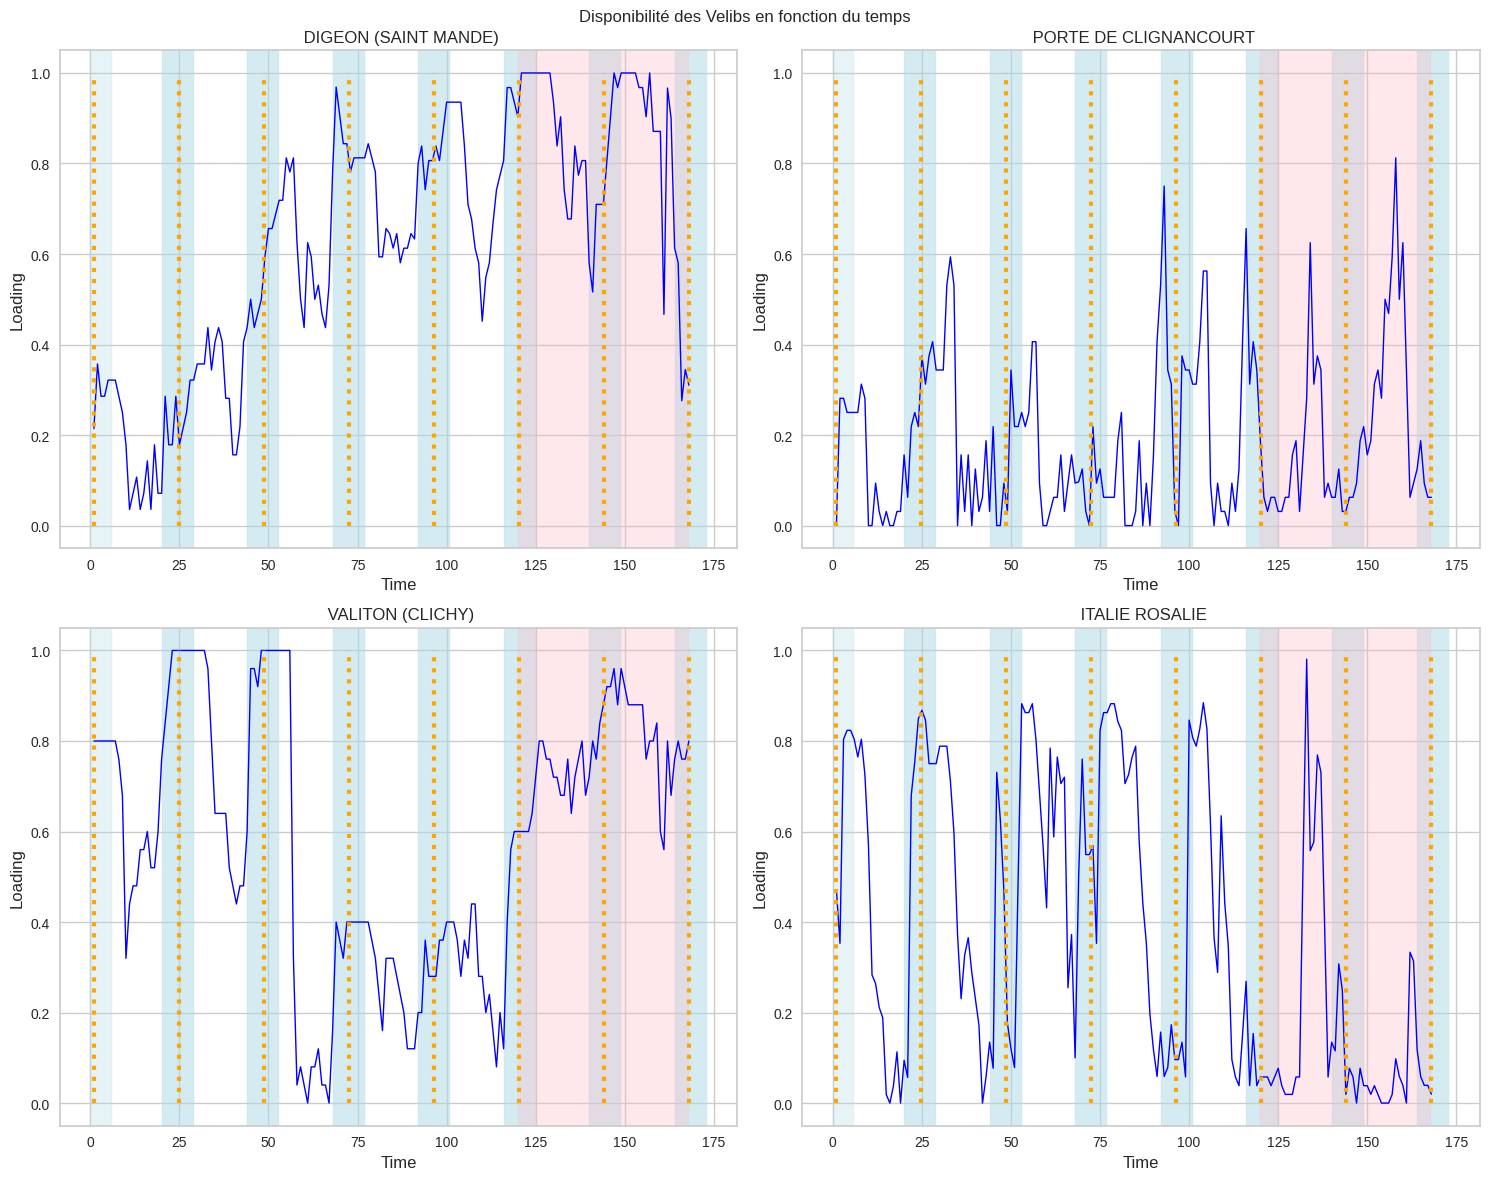

In [292]:
stations = np.arange(loading.shape[0])
rd.shuffle(stations)
stations = stations[:4]

loading_data = loading.to_numpy()

n_steps = loading.shape[1]  # number of observed time steps
time_range = np.linspace(1, n_steps, n_steps)  # observed time range
time_tick  = np.linspace(1, n_steps, 8)  # beginning of days


fig, axs = plt.subplots(2, 2, figsize = (15,12))



for i in range(2):
    for j in range(2):
        k_station = stations[2 * i + j]
        axs[i, j].plot(time_range, loading_data[k_station, :], linewidth = 1, color = "blue")
        axs[i, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i, j].set_title(coord.names[1 + k_station], fontsize = 12)
        
        
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.axvspan(0,6, color='lightblue', alpha=0.3)
    for i in range(n_steps):
        if i % 24 == 20:
            ax.axvspan(i,i+9, color='lightblue', alpha=0.5)
    ax.axvspan(120,168, color='lightpink', alpha=0.3) # tres visible sur canal saint denis
            
fig.suptitle("Disponibilité des Velibs en fonction du temps")    
plt.tight_layout()
plt.show()



Pour une station donnée, nous avons représenté le ratio de chargement en fonction du temps et délimité les jours de la semaine. En analysant les graphiques, il semble apparaître une tendance de remplissage différente entre le jour et la nuit. 
De même, on repère sur ces graphes des comportements différents pour certaines stations entre les intervalles de temps des jours ouvrés et ceux du weekend (heure située entre 120 et 168, en rouge sur le graphe). 

Enfin, on souligne également une certaine disparité de comportement des stations. La situation géographique semble influencer le comportement des stations.

### Boxplot des variables

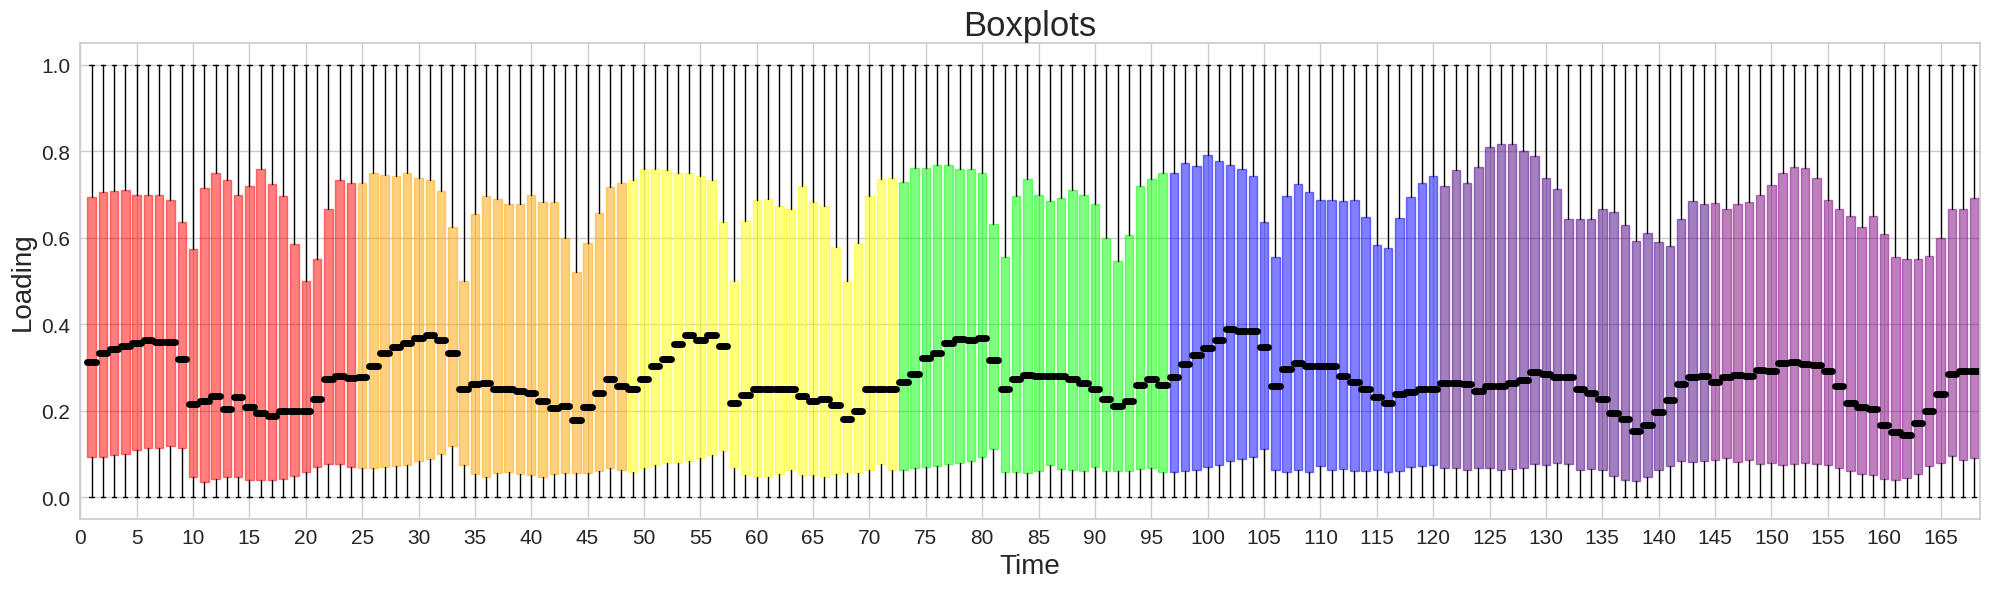

In [293]:
plt.figure(figsize = (20,6))

# --- #

bp = plt.boxplot(loading_data, widths = 0.75, patch_artist = True)

for box in bp['boxes']:
    box.set_alpha(0.8)

for i,box in enumerate(bp['boxes']):
    box.set_alpha(0.5)
    if i//24 ==0:
        box.set_color('#FF0000')
    elif i//24 ==1:
        box.set_color('#FFA500')
    elif i//24 ==2:
        box.set_color('#FFFF00')
    elif i//24 ==3:
        box.set_color('#00FF00')
    elif i//24 ==4:
        box.set_color('#0000FF')
    elif i//24 ==5:
        box.set_color('#4B0082')
    else:
        box.set_color('#800080')
    
for median in bp['medians']:
    median.set(color = "black", linewidth=5)
    
# --- #
    
#plt.vlines(x = time_tick, ymin = 0, ymax = 1, 
#           colors = "black", linestyle = "dotted", linewidth = 5)

# --- #

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()





Le tracé du bloxplot sur les données confirme le caractère périodique que nous prêtions au remplissage des stations : le comportement des stations dépend du jour de la semaine (ouvré ou non) et du moment dans la journée. De plus, les données ne sont pas symétriques puisque les médianes ne se situent pas au milieu des boîtes à moustache, et varient selon les heures entre 0.2 et 0.4. On remarque que toutes les variables ne sont pas à la même échelle. Ce qui traduit le fait que le remplissage ne suit pas la meme distribution selon l'heure et le jour. 

On observe bien qu'il n'y a que des valeurs comprises entre 0 et 1 ce qui est cohérent pour un ratio.



### Comportement moyen du remplissage

In [294]:
print('--- Average fill rate ---')
print(loading.mean().mean())

# --- #
print('')

loading_mean = pd.Series(loading.mean(axis=1))

print('--- Least crowded station, on average ---')
i = loading_mean.idxmin()
print('Average fill rate :',loading_mean[i])
print(coord.loc[i])

# --- #
print('')

print('--- Fullest station, on average ---')
i = pd.Series(loading.mean(axis=1)).idxmax()
print('Average fill rate :',loading.mean(axis=1)[i])
print(coord.loc[i])



--- Average fill rate ---
0.3816217759807477

--- Least crowded station, on average ---
Average fill rate : 0.016132842025699153
longitude              2.427934
latitude              48.873929
bonus                         1
names         HORNET (BAGNOLET)
Name: 997, dtype: object

--- Fullest station, on average ---
Average fill rate : 0.9193722943722953
longitude                          2.398262
latitude                           48.81466
bonus                                     0
names         INSURRECTION AOUT 1944 (IVRY)
Name: 1107, dtype: object


En moyenne, les stations sont remplies à 38%. Pour information, la station Hornet est en moyenne la plus vide et la station insurrection août 1944 est la plus remplie.En recherche de Vélib, nous vous conseillons donc de vous diriger vers Ivry plutôt que Bagnolet. 
Tandis que la station  insurrection août 1944 est presque pleine en moyenne, il n'y a presque jamais de vélos en moyenne dans la station Hornet. Ce qui montre une grande disparité dans le comportement des stations.  

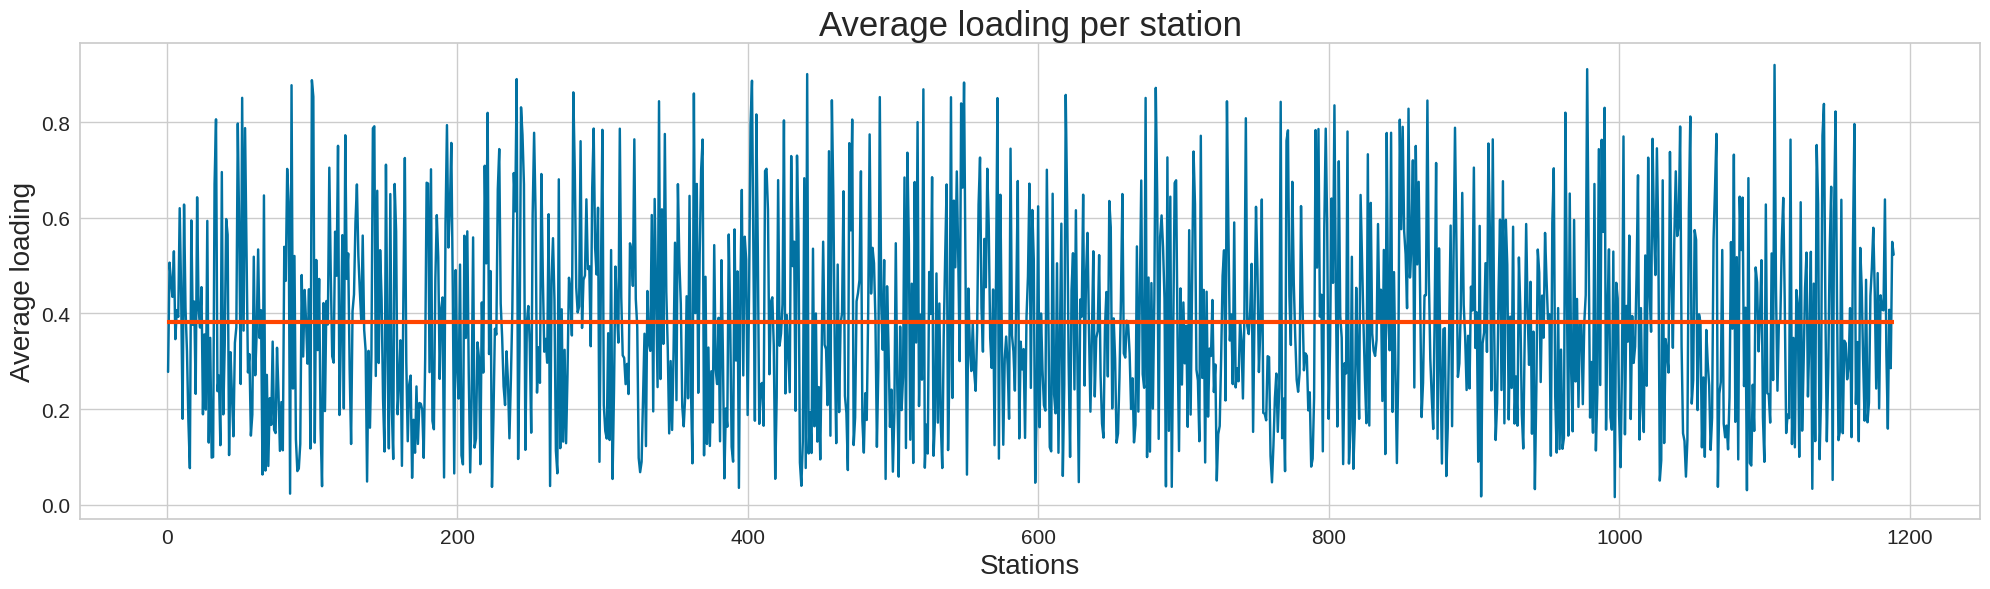

In [295]:
n_stations = loading.shape[0]  # number of observed stations
stations   = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations, 
           colors = "OrangeRed", linewidth = 3)

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Average loading', fontsize = 20)
plt.title("Average loading per station", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

La ligne orange représente le remplissage moyen de toutes les stations, et le graphe bleu le remplissage moyen par station. Au vu des fluctuations de la courbe bleue autour de la moyenne globale, on conclut que la moyenne du remplissage est très différente selon les stations.




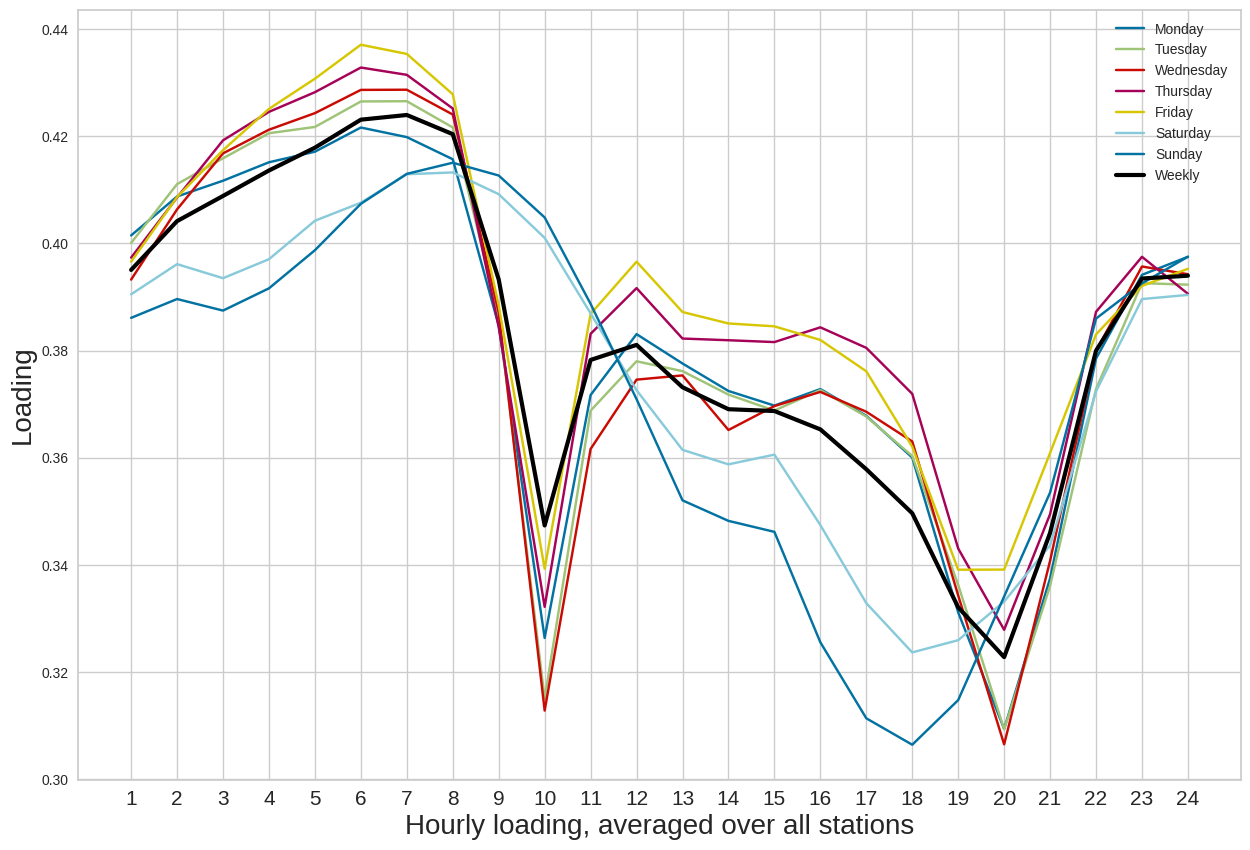

In [296]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(np.arange(1,25), mean_per_hour_per_day.transpose())
plt.plot(np.arange(1,25), mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(1,25), labels=np.arange(1,25), fontsize = 15)
  
plt.tight_layout
plt.show()

Ci-dessus nous retrouvons l'évolution heure par heure du remplissage, et ce pour chaque jour de la semaine étudiée. En noir, nous avons la moyenne heure par heure pour tous les jours. Un motif se distingue nettement pour l'ensemble des stations pour des plages horaires spécifiques. Les cinq premiers jours de la semaine ont une allure plutôt similaire avec de grandes variations de remplissage entre 8h et 11h et entre 18h et 22h. Les différence viennent prinicpalement du weekend. Ceci confirme que par la suite il sera judicieux de séparer la semaine en deux : jours ouvrés et weekend.

### Un titre ici

Par la suite, nous allons mettre en évidence le lien entre le comportement des stations et les variables longitude, latitude et bonus du dataframe "coord". 

Pour une approche plus visuelle et intuitive, nous avons ensuite décidé d'afficher les stations sur un plan grâce aux coordonnées GPS dont nous disposons. De plus, nous avons fait en sorte que les stations soient idenifiables selon leur niveau de remplissage. Pour rappel, plus le remplissage est proche de 1, plus la station aura des Vélib de libres

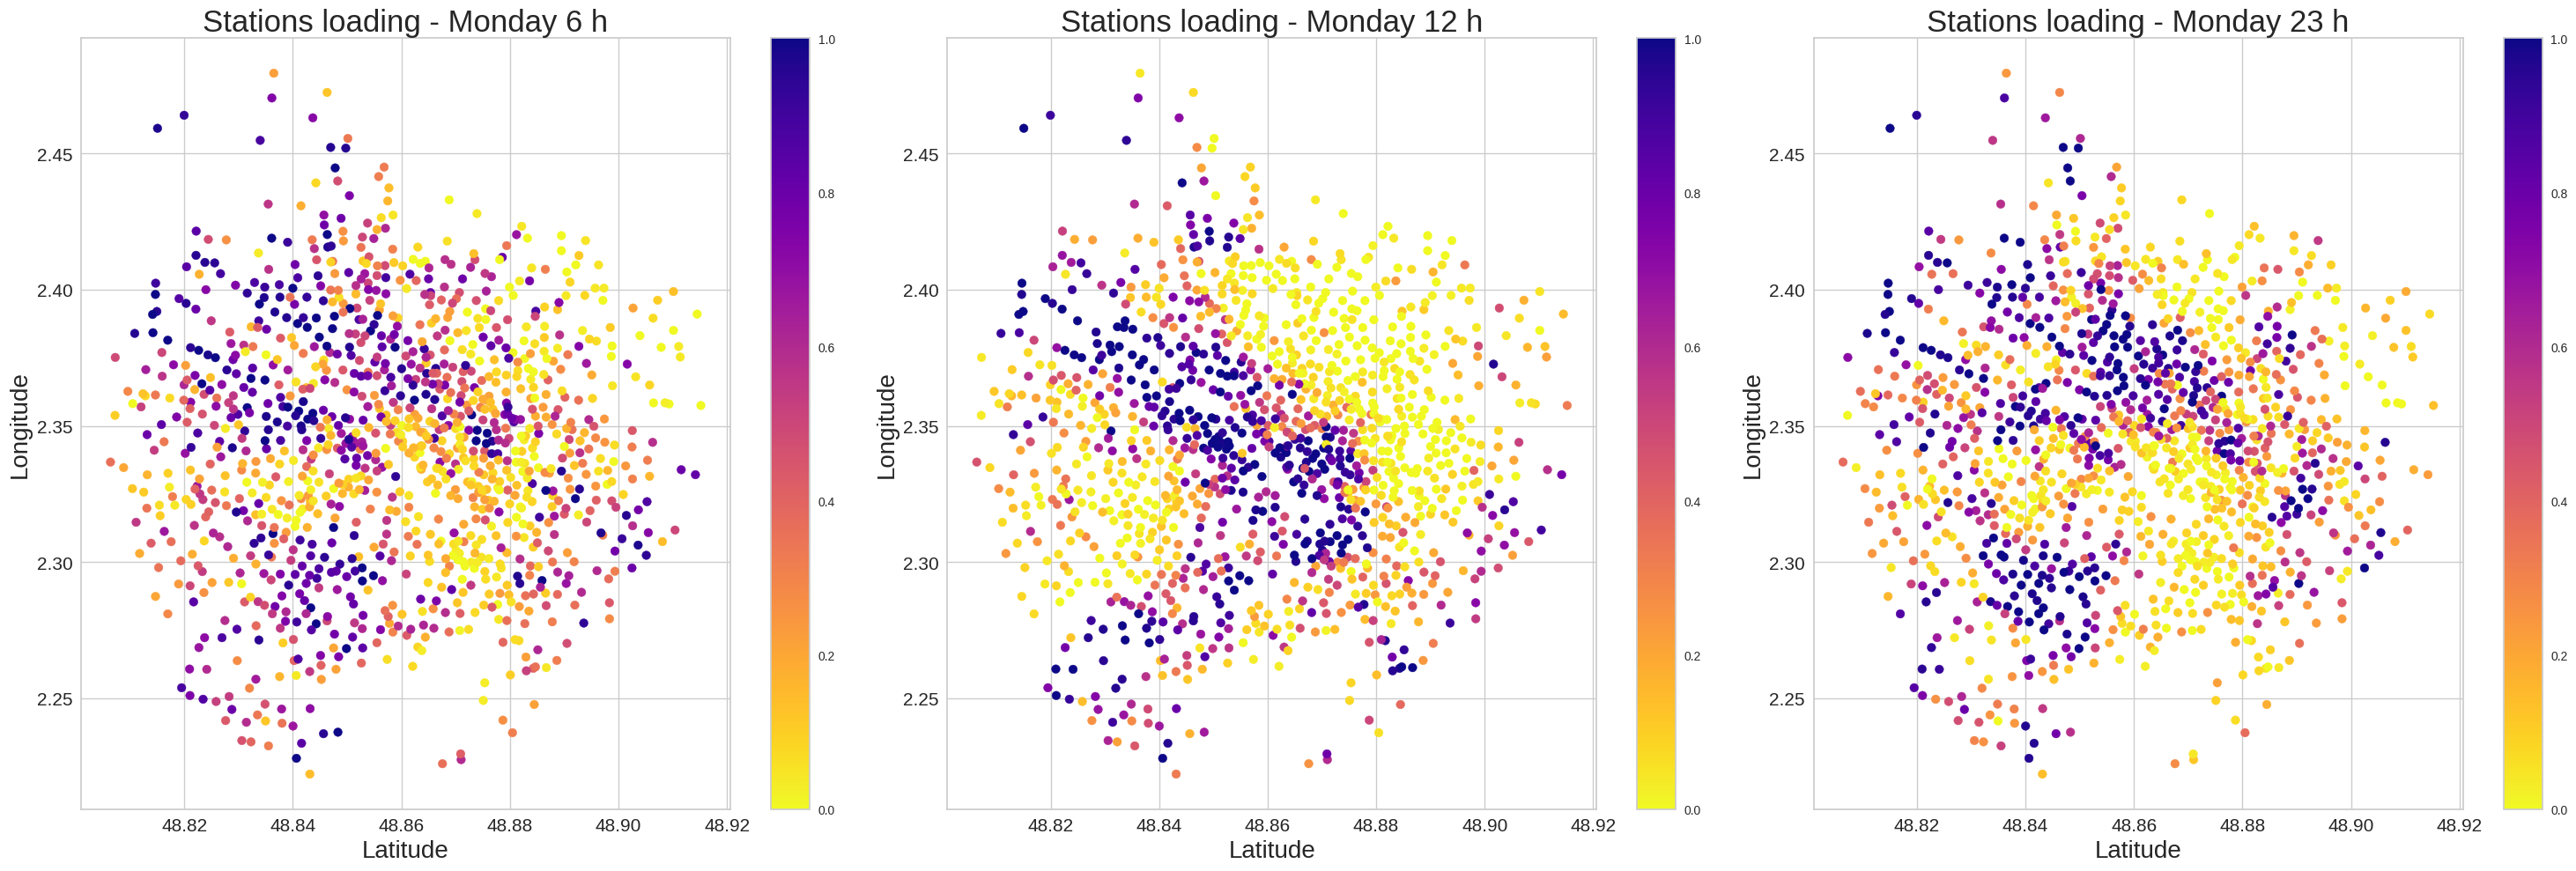

In [297]:


hours = [6, 12, 23]
s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.latitude, coord.longitude, c = loading_data[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

Le lundi on remarque que le remplissage semble être similaire à 6h et à 23h, cependant à midi on remarque que le centre s'éclaircit. Cela signifie qu'entre 6h et midi, les gens sont venus déposer leurs vélibs en centre-ville, là où la périphérie semble avoir moins de vélibs à proposer. On peut en déduire une tendance à venir de la périphérie vers le centre-ville entre 6h et midi, et l'inverse entre midi et 23h. Cela correspondrait à venir travailler au centre-ville depuis les périphéries en vélo, et revenir chez soi. C'est plausible, surtout dans les cas d'un jour ouvré tel que le lundi.

Nous pouvons affiner un peu plus cette hypothèse en regardant la différence aux horaires des pics que nous avons observé dans les graphiques plus haut : 10h et 20h.

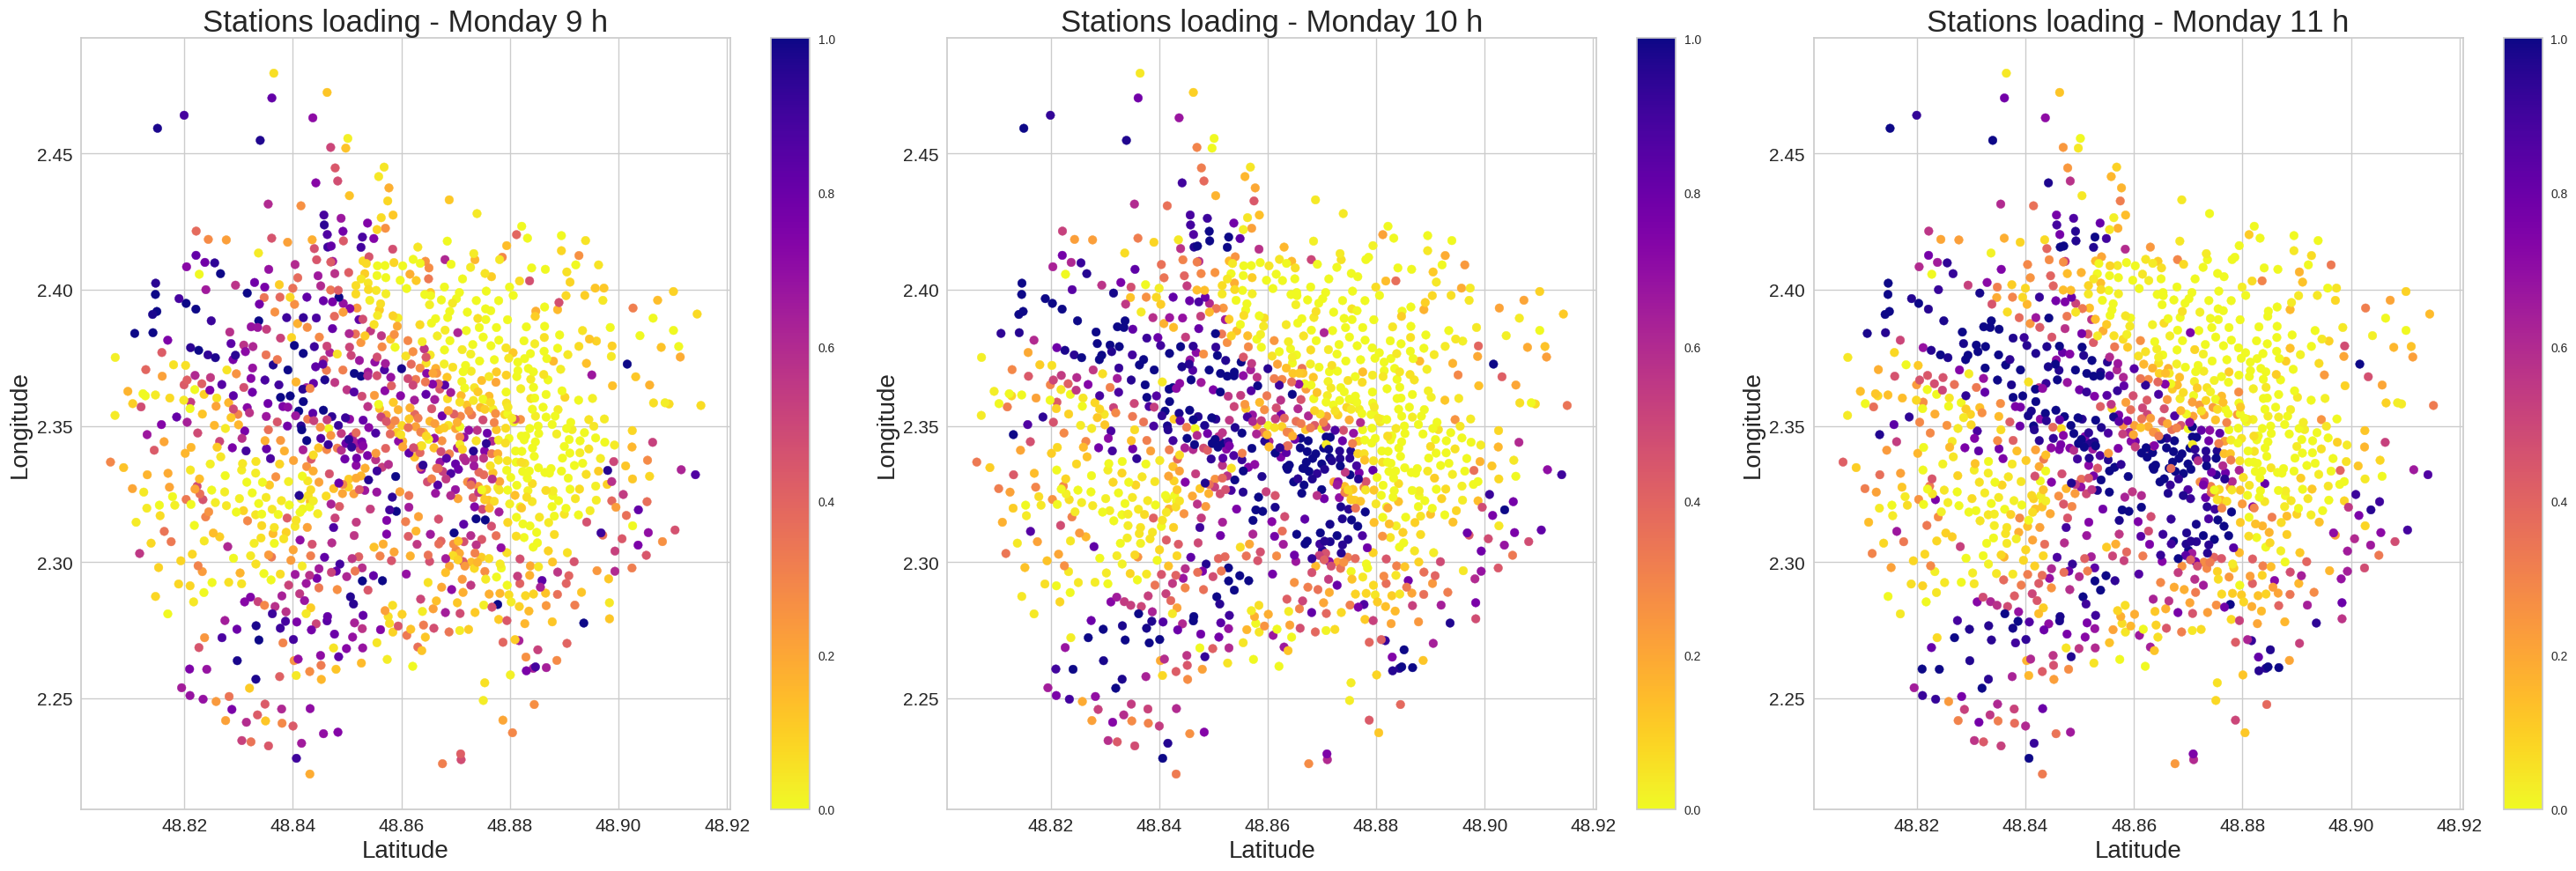

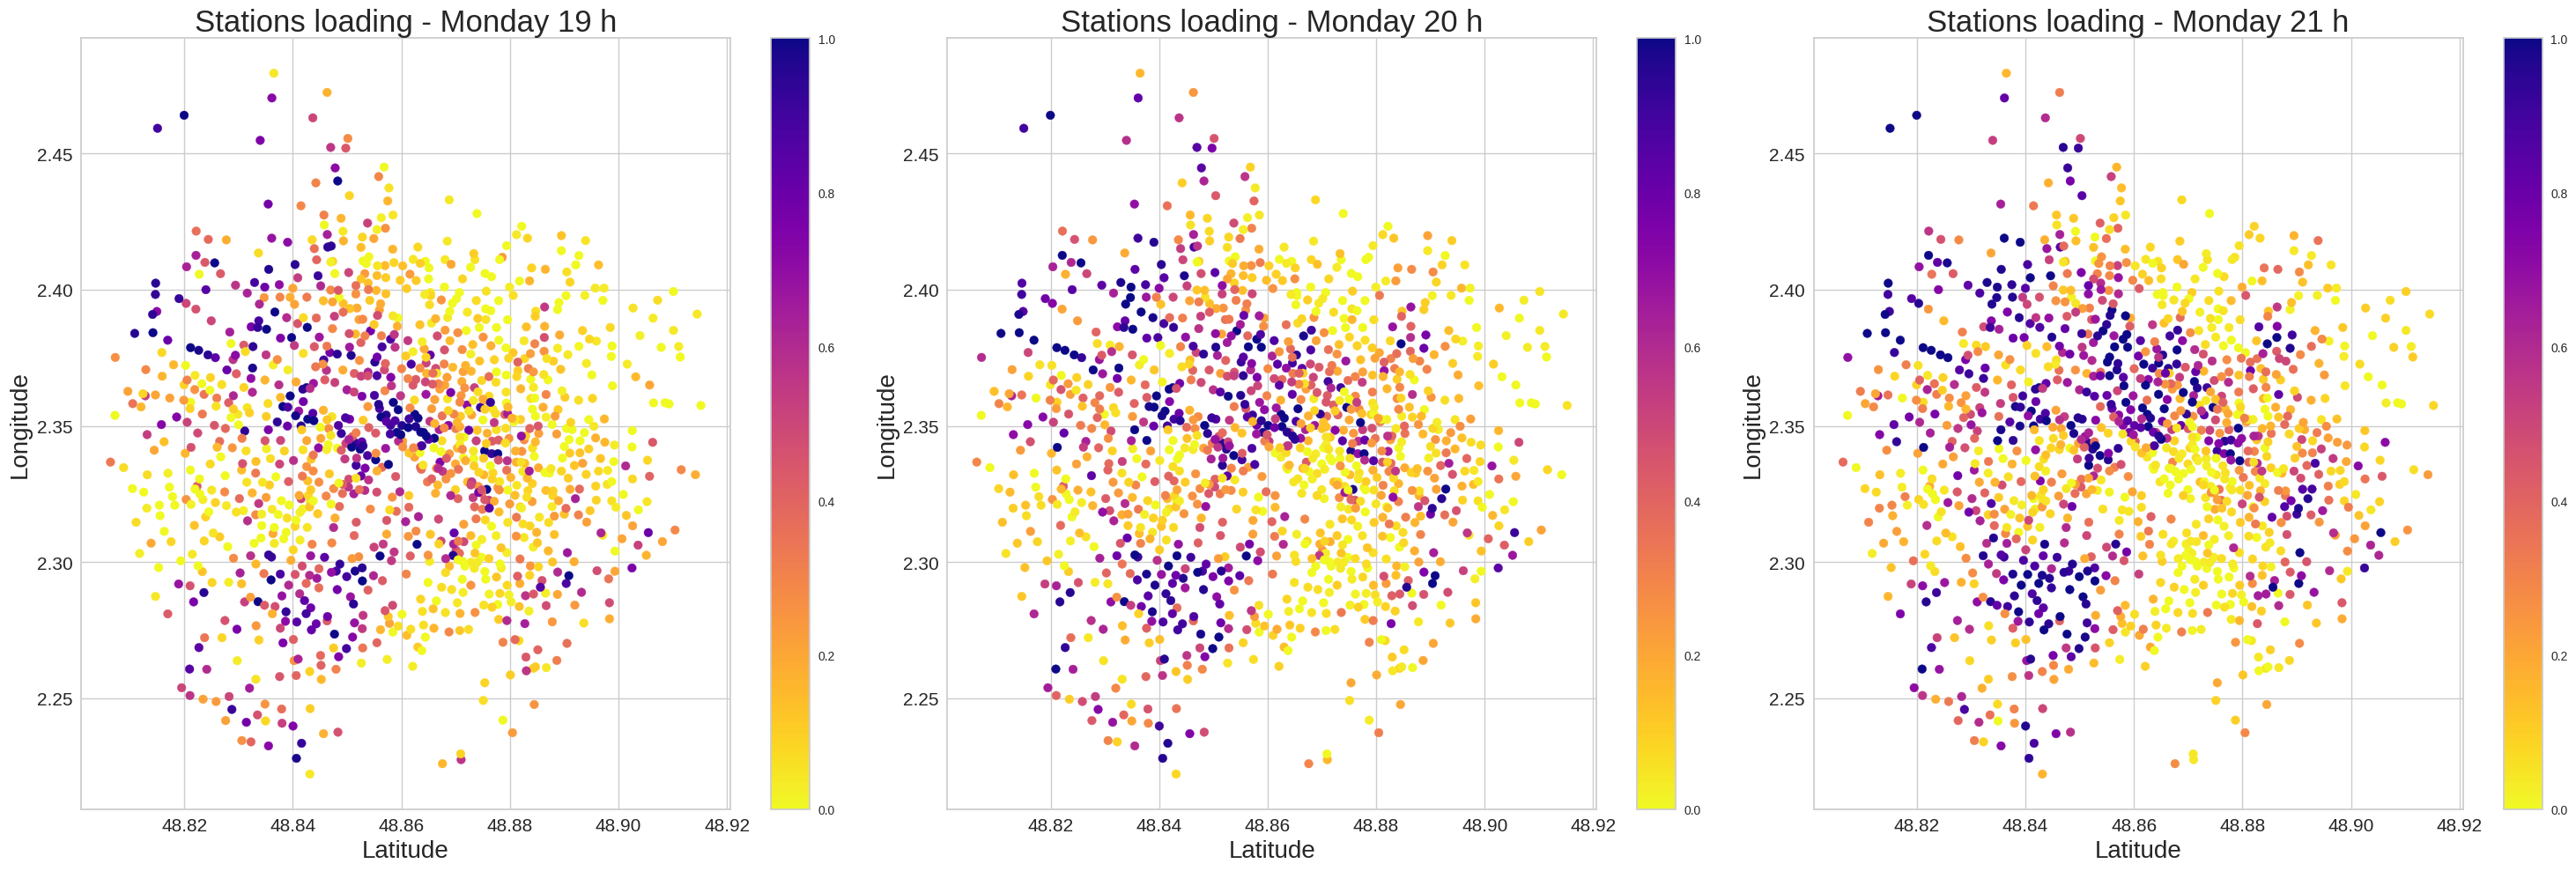

In [298]:
hours = [9, 10, 11]
s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.latitude, coord.longitude, c = loading_data[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    

plt.tight_layout()
plt.show()


hours = [19, 20, 21]
s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.latitude, coord.longitude, c = loading_data[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    

plt.tight_layout()
plt.show()

Nous pouvons effectivement noter un fort contraste à 11h entre le centre quasiment rempli, et la périphérie quasiment vide. Ce qui est moins visible à 6h. 
De même, à 21h, on remarque le phénomène inverse, le contraste s'amoindrit par rapport à l'après-midi.


Maintenant que nous avons visualisé cette évolution sur un jour, faisons la même chose mais sur plusieurs jours. Regardons si à un horaire donné, le remplissage diffère selon le jour.

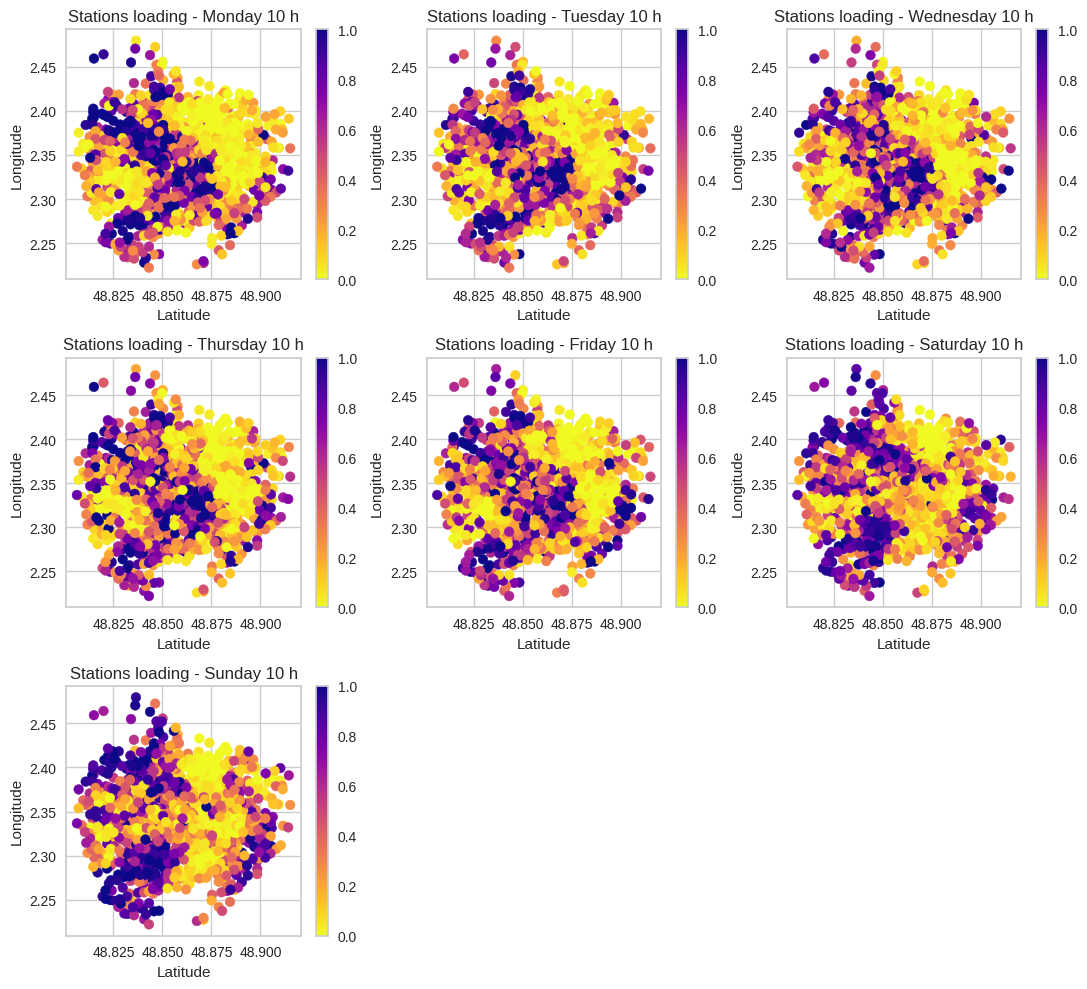

In [299]:
h = 10
hours = np.arange(h, 168, 24)

load_per_hour = loading_data[:, hours]

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# --- #

s, m = 10, 3
k = 1 + len(days)//m

fig = plt.figure(figsize=(s+1, s))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.3, wspace=.25)

for (i,d) in enumerate(days):
    ax = fig.add_subplot(k, m, i+1)
    im = ax.scatter(coord.latitude, coord.longitude, c = load_per_hour[:,i], cmap = cm.plasma_r)
    plt.colorbar(im)
    
    ax.set_title('Stations loading - ' + d + ' {} h'.format(h))
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()




On remarque qu'à 10h, il y a plus de vélibs en périphérie les samedis et dimanches que les jours ouvrés. Ce qui semble cohérent puisque les weekends la majorité des personnes ne va pas au travail et n'emprunte donc pas de vélibs pour se déplacer des périphéries vers le centre. 

Pour compléter notre analyse, nous allons à l'aide de curseurs visualiser les différences de remplissage des stations sur toutes les plages horaires et tous les jours de la semaine. 

In [300]:
from ipywidgets import interact, IntSlider, Dropdown

# Ne pas mettre Sunday 24h

# Définition des heures et des jours ainsi que de la taille des graphes
hours = np.arange(0, 24)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
s, n = 10, len(hours)

# Création de la fonction qui génère le graphique en fonction de l'heure et du jour choisis
def plot_hour_day(hour, day):
    fig, ax = plt.subplots(figsize=(s, s))
    im = ax.scatter(coord.longitude, coord.latitude, c=loading_data[:, hour + 24*(days.index(day))], cmap=cm.plasma_r)
    ax.set_title('Stations loading - {} {} h'.format(day, hour), fontsize=25)
    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Latitude', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    plt.colorbar(im, ax=ax)
    plt.show()


# Création de l'interface interactive avec deux curseurs pour choisir l'heure et le jour
interact(plot_hour_day, hour=IntSlider(min=1, max=24, step=1, value=1), day=Dropdown(options=days, value='Monday', description='Day:'))

interactive(children=(IntSlider(value=1, description='hour', max=24, min=1), Dropdown(description='Day:', opti…

<function __main__.plot_hour_day(hour, day)>


On remarque que la fréquentation des stations semble éparse, surtout de minuit à 10h. Cependant on parvient déjà à dégager certains motifs caractéristiques en fonction des plages horaires. En effet, les jours ouvrés de 10h (respectivement le weekend à partir de 14h) à 20h environ, on remarque un fort contraste de fréquentation. D'une part la partie Nord des stations et une petite partie au Sud autour de 2.3 de longitude, où pratiquement tous les vélos ont été empruntés. D'autre part il apparait un arc qui regroupe la plupart des stations où tous les vélos sont disponibles en journée. Cela pourrait s'interpréter par les usages clients liés aux mobilités du travail ou de la vie active. A l'inverse, on repère un autre comportement différent dans la fréquentation de stations à partir de 20h jusqu'à minuit. Certaines stations qui sont pratiquement vides en journée redeviennent en grande partie disponible. Enfin, les mercredis, jeudis et vendredis, de 4h à 6h on observe une diagonale partant du Nord-Ouest jusqu'au Sud-Est où les stations sont vides.


## Analyse d'individus spécifiques : le cas particulier de stations situés sur des collines

Portons désormais une attention particulière à la variable binaire 'bonus' du jeu de données Coord. Cette variable nous indique si la station se situe sur une colline (bonus=1) ou non. Remarquons que la station dont le remplissage était le moins important se situait sur une colline. Il serait, de ce fait, intéressant de relever si les stations présentant cette caractéristique particulière se comportent différemment des autres stations. Cela nous donnera un premier indice sur l'impact de la géographie des stations sur les flux de Velibs et les usages qui lui sont spécifiques.

In [301]:
nb_pente = sum(coord['bonus'] == 1)

no_hill = sum(coord['bonus'] == 0)

print(nb_pente)

print("Proportion des stations situées en altitude:")

print(nb_pente / (nb_pente + no_hill))

127
Proportion des stations situées en altitude:
0.10681244743481917




127 soit 10,7% des stations sont situées en altitude à Paris.


Plaçons les sur une map pour plus de clarté.

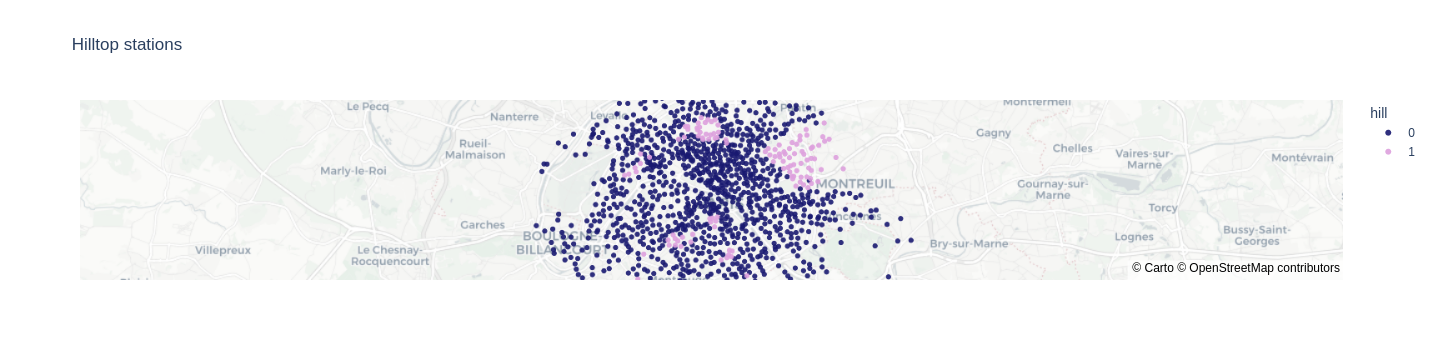

In [302]:
coord['hill'] = coord['bonus'].astype('category') # convert to categorical

# --- #

fig = px.scatter_mapbox(coord, lat = 'latitude', lon = 'longitude',
mapbox_style = "carto-positron",
color = 'hill',
color_discrete_map = {0:'midnightblue', 1:'plum'},
labels = {0: "hello", 1: "hi"},
zoom = 10, opacity = .9,
title = 'Hilltop stations')

fig.show()

Les stations en altitudes sont localisées dans sept zones différentes. On remarque également dans l'ensemble, une agglomération de ces stations

Passons désormais à l'étude du remplissage de ces stations par rapport aux autres pour voir si des tendances se dégagent. pour celà nous allons représenter la moyenne de remplissage des stations en distinguant si elles sont en altitude ou pas

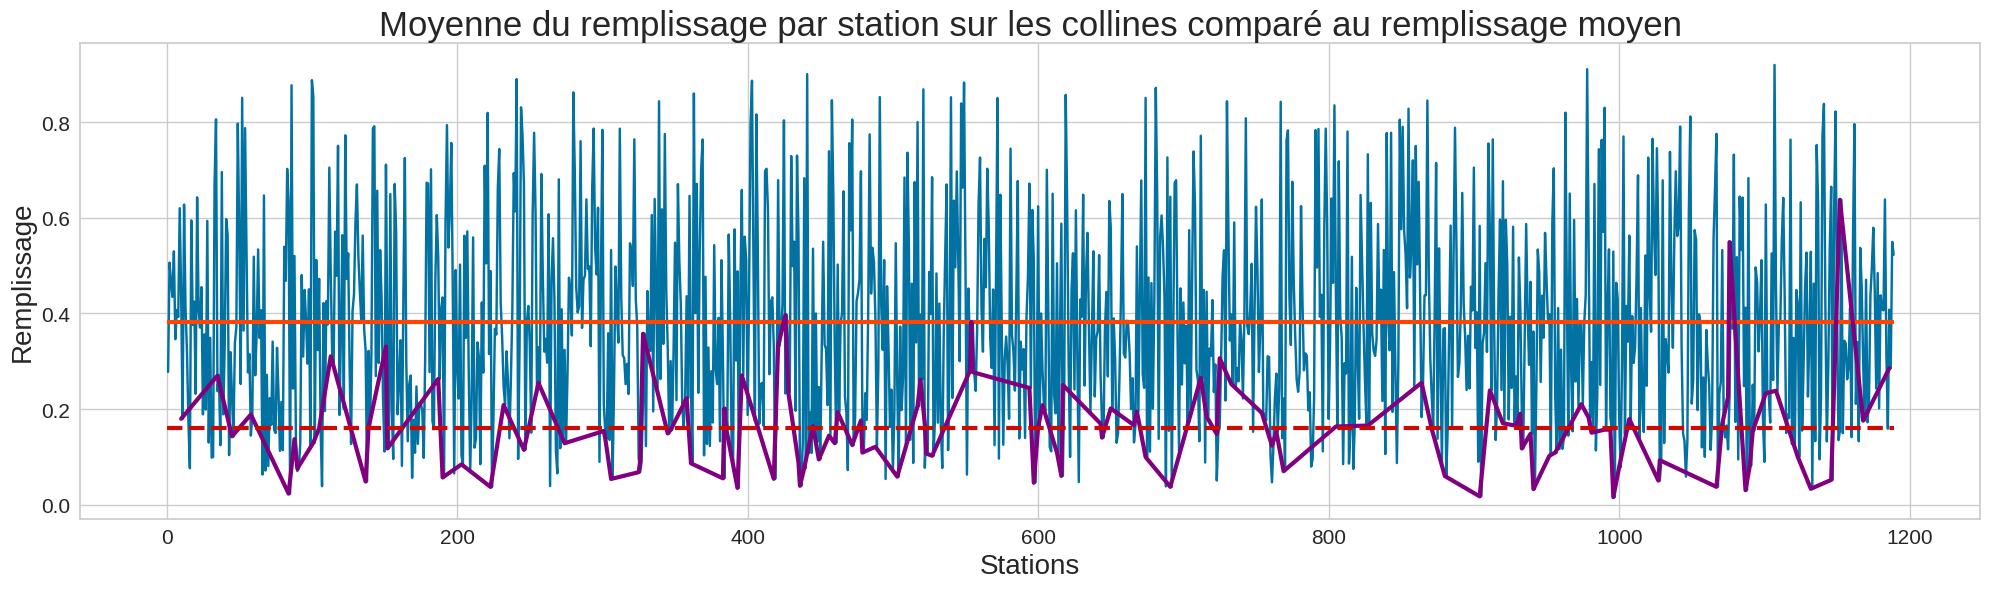

0.16104660259524076


In [303]:
coord_data = coord.to_numpy()
index_hill = []
for i in range(len(coord_data)):
    if coord_data[i][-3] == 1:
        index_hill.append(i)
index_hill = np.array(index_hill)

index_not_hill = []
for i in range(len(coord_data)):
    if coord_data[i][-3] == 0:
        index_not_hill.append(i)
index_not_hill = np.array(index_not_hill)

loading_hill = loading_data[index_hill]

loading_hill_mean = pd.Series(loading_hill.mean(axis=1))

n_stations = loading.shape[0] 
stations = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations,
colors = "OrangeRed", linewidth = 3)

plt.plot(index_hill,loading_hill_mean, color = 'purple', linewidth = 3)
plt.hlines(y = loading_hill_mean.mean().mean(), xmin=0, xmax=n_stations,
colors = "r", linewidth = 3, linestyles = '--')

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Remplissage', fontsize = 20)
plt.title("Moyenne du remplissage par station sur les collines comparé au remplissage moyen", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

print(loading_hill_mean.mean().mean())


Le graphe ci-dessus met en lumière le fait que les stations situées ont en moyenne tendance à être beaucoup moins remplies que la moyenne des stations. La valeur moyenne de remplissage des stations sur les collines se situe en moyenne autour de 0.16 contre 0.38 pour la moyenne toutes stations confondues, soit pratiquement deux fois moins. On peut donc déduire un usage différents des Velibs en altitude. On peut conjecturer qu'en raison de la difficulté de monter une pente avec un vélo, les usagers auront tendance à ne pas fréquenter ces stations.

$\textbf{Conclusion :}$ 
De cette première étude des données, on retient que des tendances se dégagent selon la zone géographique des stations : stations au centre ville ou en altitude. De plus, le comportement des utilisateurs n'est pas le meme pour un jour ouvré ou non. Ceci est une bonne intuition des différents profils qui se dégageront de notre analyse.

## II- Analyse en Composantes Principales


Notre DataFrame loading contient 168 variables. Ce qui fait beaucoup de variables à analyser. Nous allons donc faire une Analyse en Composantes Principales (ACP) pour réduire leur nombre. En effet, l'ACP est une technique de réduction de la dimensionnalité des données. Elle est utilisée pour explorer et visualiser des données multidimensionnelles en les projetant dans un nouvel espace de dimension inférieure, tout en conservant au maximum la variance des données d'origine.  
D'après l'analyse exploratoire, les variables ne sont pas à la même échelle puisqu'on a remarqué une dissimilarité du comportement des stations selon l'heure et le jour. Il serait donc judicieux de les centrer puis de les réduire.

In [304]:
# pca = PCA()
# df=loading
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# # Ajustement du PCA sur les données
# pca.fit(df_scaled)




In [305]:
ss = StandardScaler()
loading_scaled = ss.fit_transform(loading)
pca = PCA()
loading_pca = pca.fit_transform(loading_scaled)

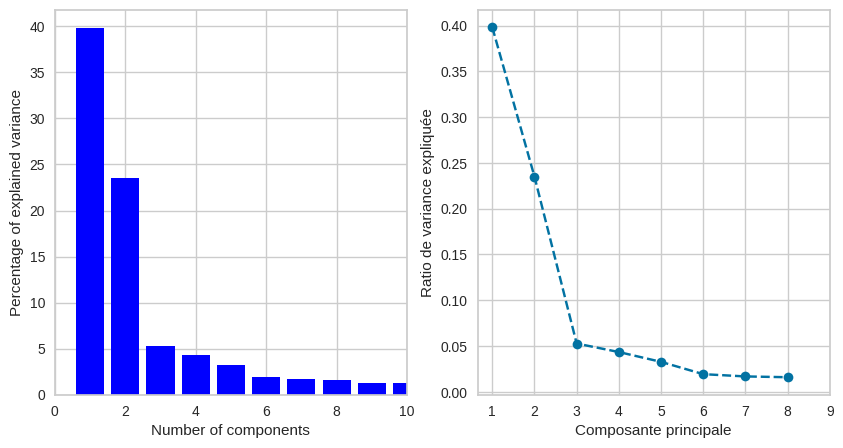

Pourcentage de l'inertie expliquée par les 3 premières composantes: 68.6


In [306]:
plt.figure(figsize = (10, 5))
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 20
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars], color='blue')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.xlim(0, 10)

plt.subplot(1,2,2)
# Tracé du graphe de l'inertie des composantes principales
plt.plot(range(1,9), pca.explained_variance_ratio_[:8], marker='o', linestyle='--')
#plt.title('Variance expliquée par composante')
plt.xlabel('Composante principale')
plt.ylabel(u'Ratio de variance expliquée')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()
print("Pourcentage de l'inertie expliquée par les 3 premières composantes:", round(sum([explained_variance_ratio[i] for i in range(3)]),2))

La méthode du coude  suggère de garder 3 composantes pour expliquer 69% de la variance totale. Une grande partie de l'information serait donc perdue. 



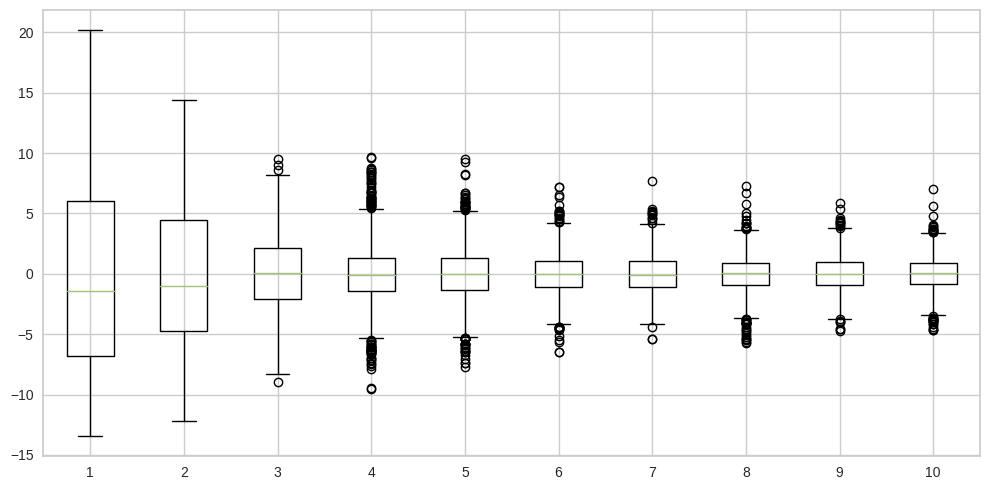

Pourcentage de l'inertie expliquée par les 5 premières composantes: 76.22


In [307]:


plt.boxplot(loading_pca[:,0:10])
plt.tight_layout()
plt.show()
print("Pourcentage de l'inertie expliquée par les 5 premières composantes:", round(sum([explained_variance_ratio[i] for i in range(5)]),2))

On choisit de garder cinq dimensions pour expliquer environ 76% de la variance. En effet, la règle suggère de garder environ 80% de l'inertie dans l'idéal, mais pour arriver à ce pourcentage ici on devrait garder huit dimensions. Ceci rendrait notre analyse difficile. De plus, à partir de la sixième composante, l'inertie portée par les composantes sont relativement petites et constantes.

### Graphe des individus sur quelques plans factoriels

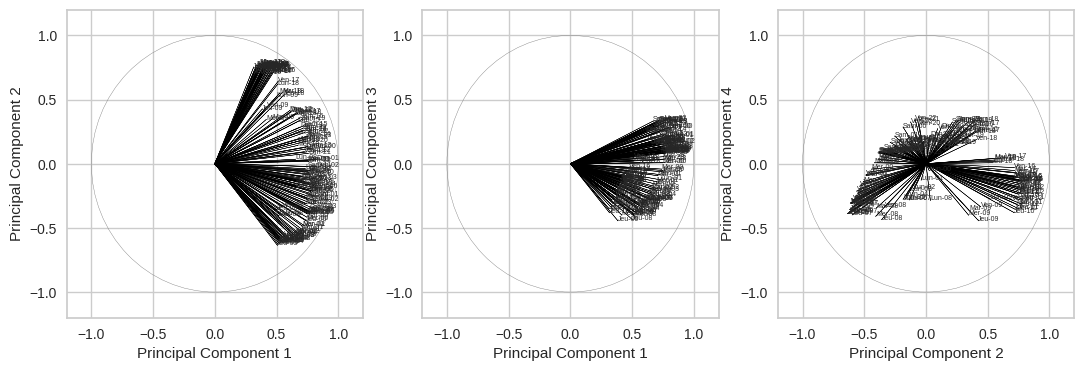

In [308]:
# Plan factoriel (1,2)
fig = plt.figure(figsize=(13,4))
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])

ax = fig.add_subplot(1, 3, 1)
for i, j, nom in zip(coord1,coord2, loading.columns):
    plt.text(i, j, nom, fontsize = 5)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.add_patch(c)




# Plan factoriel (1,3)
#fig = plt.figure(figsize=(15,15))
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])

ax = fig.add_subplot(1, 3, 2)
for i, j, nom in zip(coord1,coord3, loading.columns):
    plt.text(i, j, nom, fontsize = 5)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
ax.add_patch(c)



# Plan factoriel (2,4)
#fig = plt.figure(figsize=(15,15))
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])

ax = fig.add_subplot(1, 3, 3)
for i, j, nom in zip(coord2,coord3, loading.columns):
    plt.text(i, j, nom, fontsize = 5)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
ax.add_patch(c)
plt.show()

Les projections des variables sur les différents plans factoriels sont illisibles. Comme il s'agit de variables temporelles, nous allons tracer leur corrélation en fonction de chaque dimension. 

Les projections des variables dans les différents plans factoriels sont illisibles. Comme il s'agit de variables temporelles nous allons tracer leur corrélation en fonction de chaque dimension et utiliser un code couleur afin de les différentier.

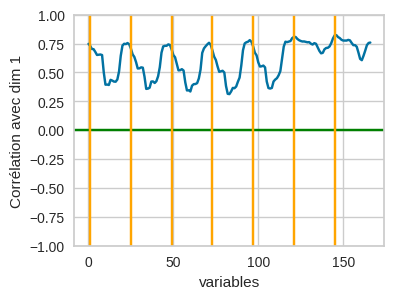

In [309]:
plt.figure(figsize=(4,3))
time_tick = [1 + 24 * i for i in range(7)]  # Vecteur délimitant les jours
i=0
plt.plot(pca.components_[i,:-1]*np.sqrt(pca.explained_variance_[i]))
plt.xlabel(u"variables")
plt.ylabel(u"Corrélation avec dim " + str(i + 1))
plt.ylim(-1, 1)
plt.axhline(0, color='green')
for tick in time_tick:
    plt.axvline(tick, color='orange')
plt.show()


On remarque que toutes les variables sont correlées positivement avec la composante 1. Cette composante mesure donc le niveau global de remplissage des stations.

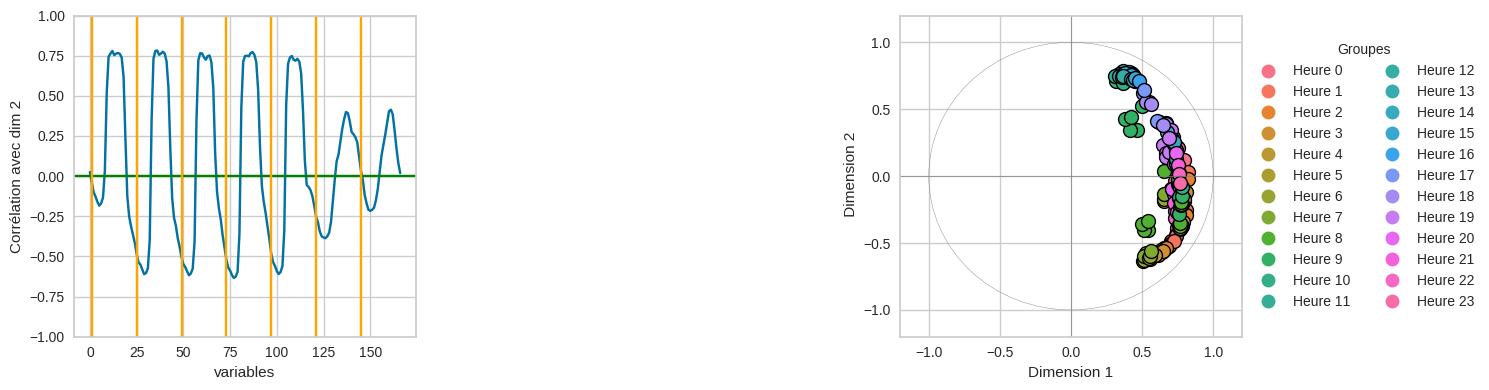

In [310]:

def group_variable_labels(variable_names, group_size):
    labels = []
    for i in range(0, len(variable_names), group_size):
        group_labels = ', '.join(variable_names[i:i+group_size])
        labels.append(group_labels)
    return labels
def group_variable_colors(variable_names):
    colors = sns.color_palette("husl", n_colors=24)
    groups = [i % 24 for i in range(len(variable_names))]
    group_colors = {group: color for group, color in zip(set(groups), colors)}
    return [group_colors[group] for group in groups], group_colors

# Création de la figure
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 3, 3)

# Coloration des variables et affichage de leurs projections sur les deux premières composantes principales avec un contour noir
colors, group_colors = group_variable_colors(loading.columns)
for i, (x, y) in enumerate(zip(coord1, coord2)):
    ax.scatter(x, y, color=colors[i], edgecolor='black', linewidth=1, s=100)

# Ajout de l'étiquette correspondant à chaque groupement dans la légende
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10, label=f'Heure {group}') for group, color in group_colors.items()]
plt.legend(handles=legend_handles, title='Groupes', loc='center left',ncol=2, bbox_to_anchor=(1, 0.5))

# Ajout du cercle
c = plt.Circle((0, 0), radius=1, color='gray', fill=False)
ax.add_patch(c)

# Définition des limites des axes
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Ajout des lignes et titres
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
#plt.title('Projection des variables sur les deux premières composantes principales')
plt.xlabel('Dimension 1')
plt.ylabel(' Dimension 2')

# Représentation des corrélations avec la deuxième composante en fonction du temps
ax2 = fig.add_subplot(1, 3, 1)
time_tick = [1 + 24 * i for i in range(7)]  # Vecteur délimitant les jours
i=1
plt.plot(pca.components_[i,:-1]*np.sqrt(pca.explained_variance_[i]))
plt.xlabel(u"variables")
plt.ylabel(u"Corrélation avec dim " + str(i + 1))
plt.ylim(-1, 1)
plt.axhline(0, color='green')
for tick in time_tick:
    plt.axvline(tick, color='orange')



plt.grid(True)
plt.tight_layout()

# Affichage du graphe
plt.show()


En identifiant les variables en fonction des heures de la journée à laquelles elles correspondent, on remarque que la deuxième composante fait le contraste entre les horaires actifs et de repos. En effet, les variables représentant les horaires de travail (8h - 19h) sont corrélées positivement avec la dimension 2 tandis que les variables correspondant aux horaires de repos (20h-7h) sont liées négativement à la dimension 2. Elle représente donc la distinction entre les taux de remplissage entre le jour et la nuit.

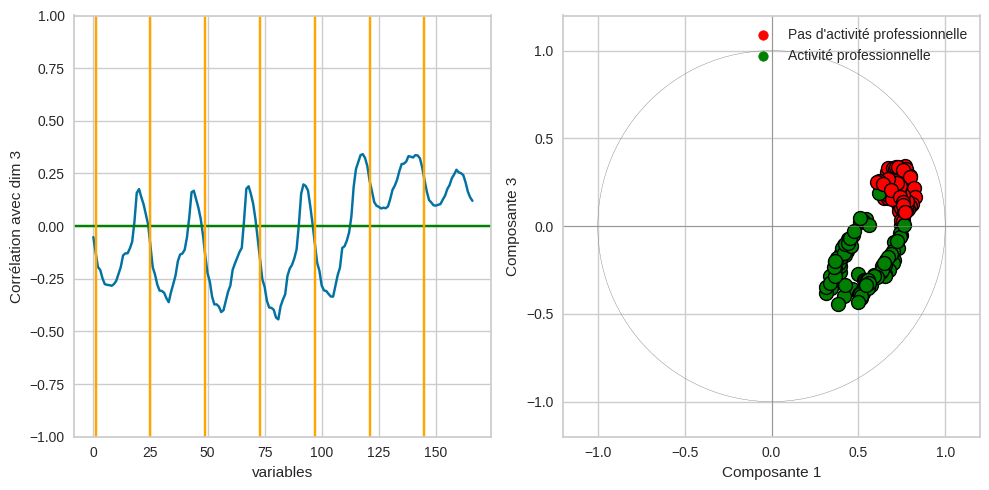

In [311]:
plt.subplot(1,2,2)
# Variables à mettre en évidence
vacances_indices = set(range(120, 169)).union(set(filter(lambda x: x % 24 in range(19, 24), range(len(loading.columns)))))

# Définition des couleurs
vacances_color = 'red'
rest_color = 'green'

# Affichage des points et coloration
for i, (x, y) in enumerate(zip(coord1, coord3)):
    color = vacances_color if i in vacances_indices else rest_color
    plt.scatter(x, y, color=color, edgecolor='black', linewidth=1, s=100)

# Ajout du cercle
circle = plt.Circle((0, 0), radius=1, color='gray', fill=False)
plt.gca().add_artist(circle)

# Définition des limites des axes
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Ajout des lignes et titres
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
#plt.title('Projection des variables sur les troisième composante principale en fonction de la première colorée selon les mobilités professionnelles')
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
plt.grid(True)

# Ajout de la légende
plt.legend(handles=[plt.scatter([], [], color='red', label='Pas d\'activité professionnelle'),
plt.scatter([], [], color='green', label='Activité professionnelle')],
title='')
plt.subplot(1,2,1)
time_tick = [1 + 24 * i for i in range(7)]  # Vecteur délimitant les jours
i=2
plt.plot(pca.components_[i,:-1]*np.sqrt(pca.explained_variance_[i]))
plt.xlabel(u"variables")
plt.ylabel(u"Corrélation avec dim " + str(i + 1))
plt.ylim(-1, 1)
plt.axhline(0, color='green')
for tick in time_tick:
    plt.axvline(tick, color='orange')



plt.grid(True)
plt.tight_layout()

# Affichage du graphe
plt.show()

En projetant les variables sur les composantes 1 et 3, on remarque que bien que la composante 3 ne soit associée qu'à une petite partie de l'inertie, elle semble traduire les différences des usages de Velibs entre les horaires .

Les variables correspondant au samedi, au dimanche, et les jours ouvrés de 19h à 23h ont toutes une corrélation positive avec la composante 3. Ces horaires semblent liés aux mobilités hors cadre professionnel. Au contraire, les variables correspondant aux jours ouvrés de 0h à 19h semblent corrélées négativement avec la dimension 3. Elle représente donc le profil des utilisations des Velibs hors cadre professionnel.

Remarque: Nous avons constaté que la composante 3 en python est l'opposée de la composante 3 sur R. Ceci ne remet pas en question nos résultats. En effet, l'ACP étant basée sur une diagonalisation de matrice, python et R semblent avoir pris des vecteurs propre oppossée pour la composante 3.

Les autres composantes ne portant que très peu de l'inertie totale, leur analyse ne semble pas pertinente.

### Graphe des individus sur le premier plan factoriel

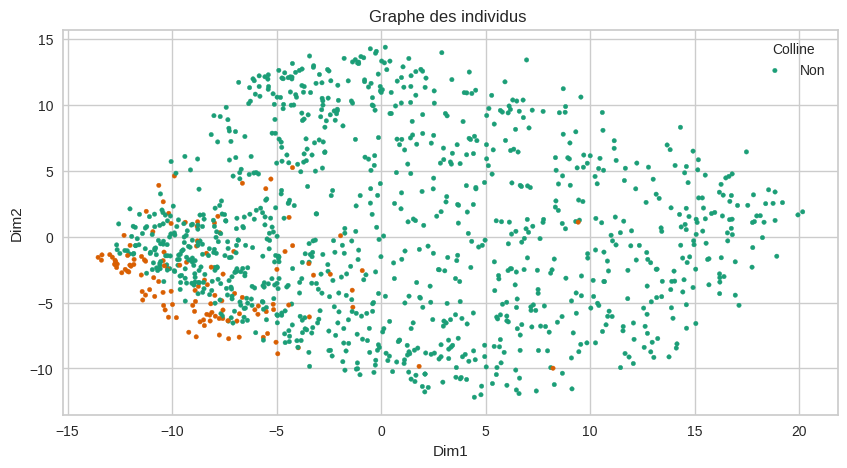

In [312]:


loading_with_hill = pd.concat([loading, coord.iloc[:, 2]], axis=1)
ss = StandardScaler()
loading_with_hill_scaled = ss.fit_transform(loading_with_hill)
pca = PCA()
loading_with_hill_pca = pca.fit_transform(loading_with_hill_scaled)

# Convert the PCA-transformed data to a DataFrame
loading_with_hill_pca_df = pd.DataFrame(loading_with_hill_pca[:, :2], columns=['Dim1', 'Dim2']) # Select only the first two principal components

# Plotting the scatter plot
palette = plt.get_cmap("Dark2")
couleurs = dict(zip(loading_with_hill["bonus"].drop_duplicates(), palette(range(2))))

plt.scatter(x='Dim1', y='Dim2', c=[couleurs[p] for p in loading_with_hill["bonus"]], data=loading_with_hill_pca_df, s=10)
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Graphe des individus ')
plt.legend(title='Colline',labels=['Non', 'Oui'])

plt.show()

Les individus localisés sur une colline sont regroupés sur le graphique. Ils sont corrélés négativement avec les dimensions 1 et 2 ce qui traduit le fait que ces stations sont en moyenne moins remplies que celles qui ne sont pas en altitude. De plus elles sont plutot utilisées pendant les horaires de repos.

$\textbf{Conclusion :}$ Grace à l'ACP, nous sommes passés de 168 variables à 5 méta-variables regroupant la majorité de l'information contenue dans notre dataframe loading. Nous avons donc un espace de dimension plus réduit où nous pourrons visualiser nos clusters afin de comprendre les  classifications faites.

## III- Clustering

Il s'agit ici de regrouper dans une même classe les stations de vélos qui présentent une certaine similitude dans leur usage. Pour celà, nous allons mettre en opposition divers algorithmes de clustering: K-means, Hierachical clustering et Gaussian Mixture Models.

### K-Means appliquée aux données sans ACP préalable

L'algorithme du k-means esst un algoithme itératif basé sur la distance et dont l'objectif est de minimiser l'inertie intra-classe à chaque étape.
Nous allons commencer par chercher le nombre de clusters optimal pour classer les stations de vélibs. Pour l'initialisation des centroïdes, nous choisissons la méthode k-means++ dans l'optique d'avoir des clusters bien séparés. 

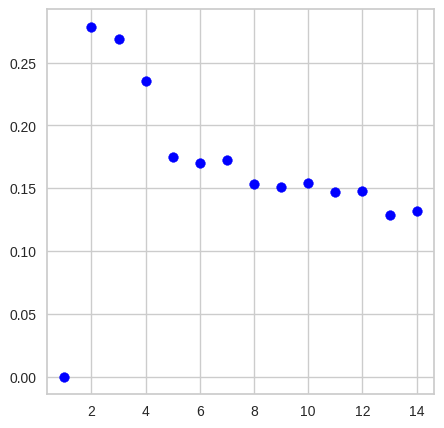

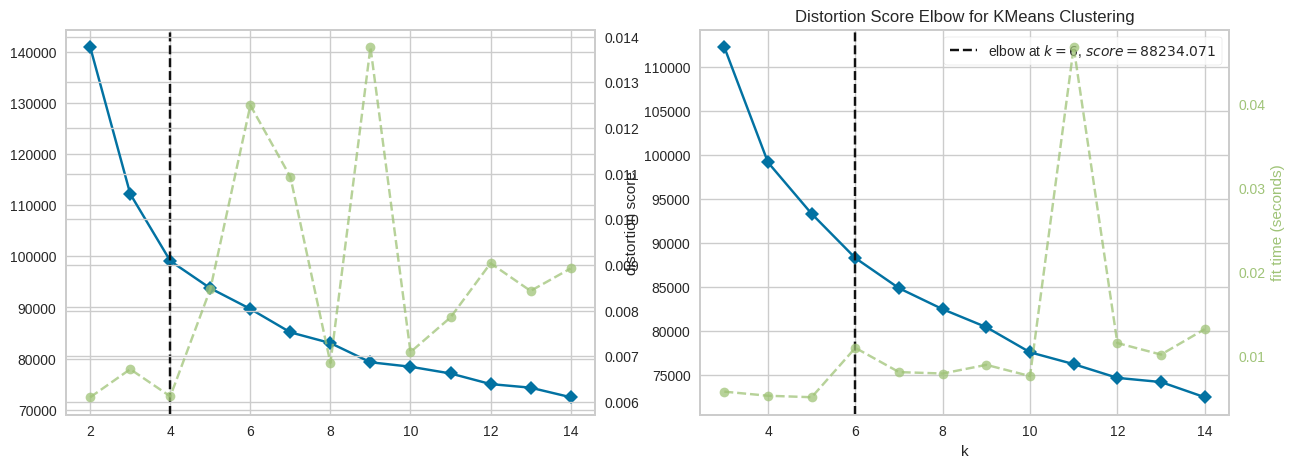

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [313]:
plt.figure(figsize = (5, 5))

k_max = 15

silhouette = []
for k in range(2, k_max):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    clusters_kmeans = kmeans.fit_predict(loading_scaled)
    silhouette.append( silhouette_score(loading_scaled, clusters_kmeans, metric='euclidean') )
silhouette = np.array(silhouette)
plt.scatter(1,0, color="blue")
plt.scatter(range(2, k_max), silhouette, color="blue")
plt.show()
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
model = KMeans(init='k-means++', n_init='auto')
visualizer = KElbowVisualizer(model,k=(2,15))
visualizer.fit(loading_scaled)        
#visualizer.title('Initialisation à k=2')


plt.subplot(1,2,2)
model = KMeans(init='k-means++', n_init='auto')
visualizer = KElbowVisualizer(model,k=(3,15))

visualizer.fit(loading_scaled)
#visualizer.title('Initialisation à k=3')
visualizer.show() 

En utilisant le score silhouette, le nombre de cluster optimal est 2. Cependant, avec l'indice de distorsion, on utiliserait 4 clusters si on initialise le nombre de clusters minimal à 2 et 6 clusters si le nombre minimal est à 3 . Nous allons chercher à comprendre ce que représentent chaque classe dans le cas de 2 ou 4 ou 6 clusters.

#### Cas K=2

In [314]:
k=2
reskmeans = KMeans(n_clusters=k,init='k-means++', n_init='auto', random_state=0)
C=reskmeans.fit_predict(loading)


##### Comparaison entre les clusters et la variable 'Bonus'

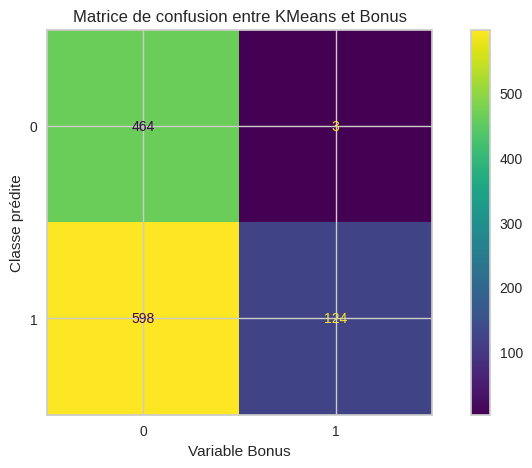

In [315]:

ConfusionMatrixDisplay(confusion_matrix(C, coord['bonus'])).plot()
plt.ylabel('Classe prédite')
plt.xlabel('Variable Bonus')
plt.title('Matrice de confusion entre KMeans et Bonus')
plt.show()

Cette classification n'isole pas les stations en fonction de leur altitude. Cependant, la majorité des stations en altitude sont dans le cluster 1. Celles ci ayant une moyenne de remplissage plus faible, on a l'intuition que ce clustering fait une classification des vélos très utlisés en moyenne et ceux moins utlisés.

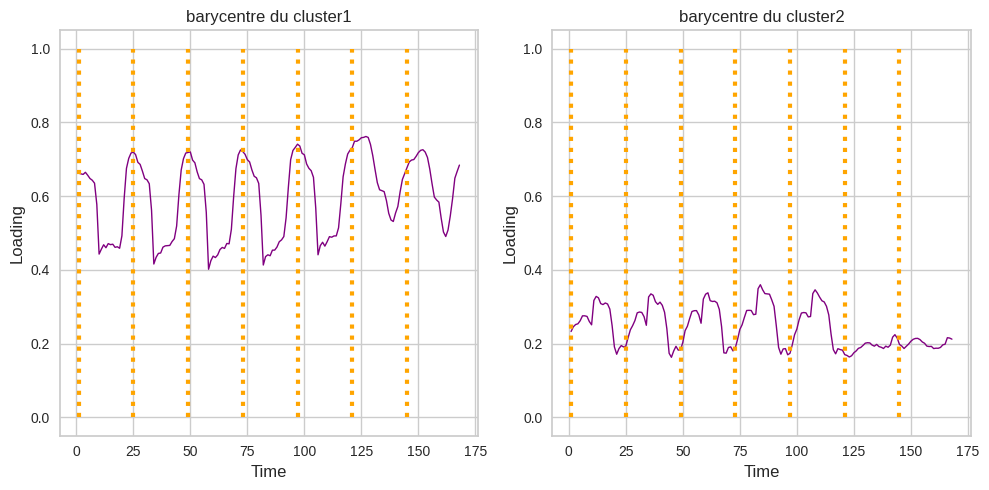

In [316]:

barycentres = reskmeans.cluster_centers_
ig, axs = plt.subplots(1, 2, figsize = (10,5))

for i in range(2):
        station = barycentres[i]
        axs[i].plot(time_range, station, linewidth = 1, color = 'purple')
        axs[i].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i].set_title('barycentre du cluster'+ str(i+1), fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

L'affichage du taux de remplissage au cours du temps des centroïdes des deux clusters confirme cette idée: Le premier cluster regroupe les stations les plus remplies en moyenne et les stations dans le cluster 2 sont celles qui sont les moins remplies

### Pour K=4

Text(0, 0.5, 'Principal Component 2')

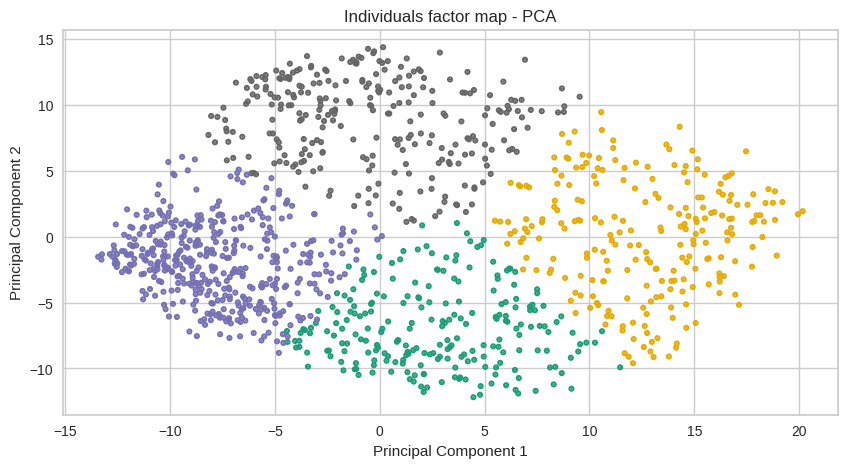

In [317]:

k=4
reskmeans2 = KMeans(n_clusters=k,init='k-means++', n_init='auto', random_state=0)
C=reskmeans2.fit_predict(loading)
cmap = plt.get_cmap('Dark2',k)
plt.scatter(loading_pca[:, 0], loading_pca[:, 1], s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')



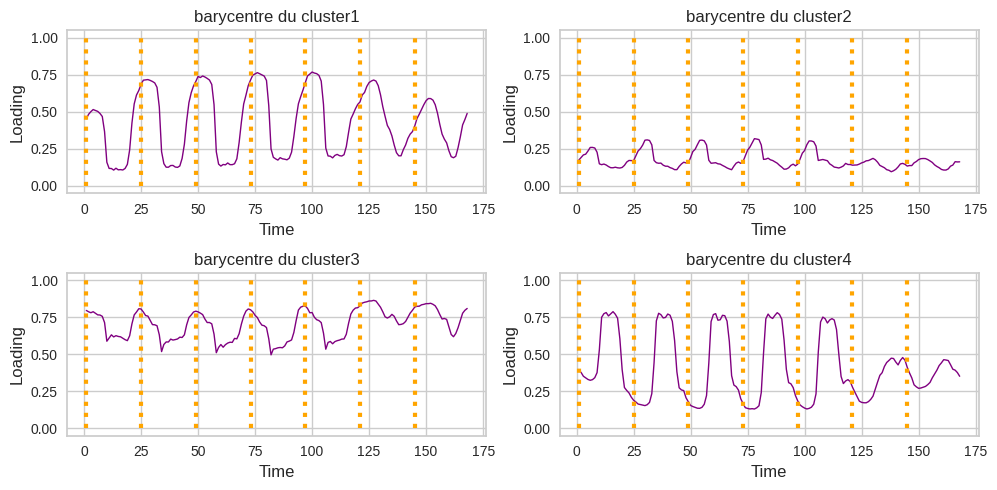

In [319]:

barycentres = reskmeans2.cluster_centers_
fig, axs = plt.subplots(2, 2, figsize = (10,5))
count=0
for i in range(2):
    for j in range(2):
        station = barycentres[count]
        axs[i,j].plot(time_range, station, linewidth = 1, color = 'purple')
        axs[i,j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i,j].set_title('barycentre du cluster'+ str(count+1), fontsize = 12)
        count=count+1
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()



Les clusters sont bien séparés dans le premier plan factoriel et isolent 4 profils d'utilisation :
- Les stations du cluster 1 sont les stations remplies entre 20h et 7h du lundi au vendredi et le weekend (horaires de repos)
- Les stations du cluster 2 représentent les stations les moins remplies 
- Les stations du cluster 3 qui sont plus remplies que la moyenne
- Les stations du cluster 4 correspondent aux stations remplies principalement entre 8h et 19h les jours ouvrés et pas les weekends (horaires actifs)


##### Cas K=6

In [320]:
k=6
reskmeans3 = KMeans(n_clusters=k,init='k-means++', n_init='auto', random_state=0)
C=reskmeans3.fit_predict(loading)
barycentres = reskmeans3.cluster_centers_



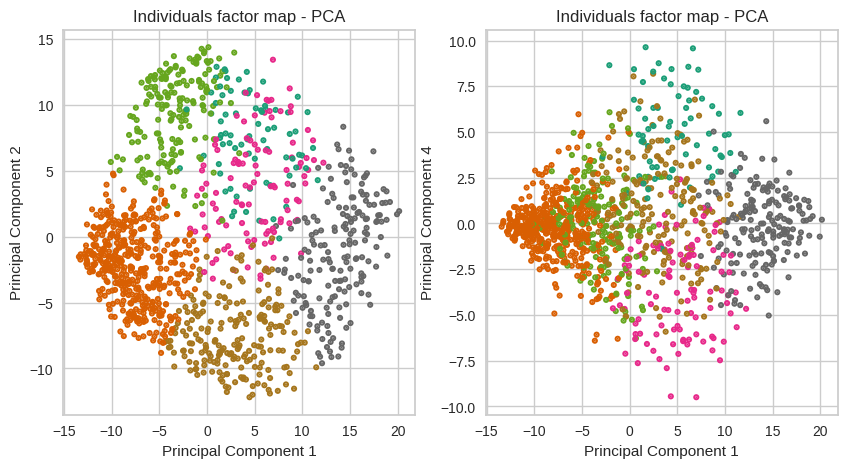

In [323]:

plt.subplot(1,2,1)
cmap = plt.get_cmap('Dark2',k)
plt.scatter(loading_pca[:, 0], loading_pca[:, 1], s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(1,2,2)
plt.scatter(loading_pca[:, 0], loading_pca[:, 3], s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
plt.show()

En représentant les individus dans l'espace d'ACP selon la classe à laquelle ils appartiennent, on remarque que les  clusters semblent bien séparés dans le premier plan factoriel (1,2) et les deux autres sont plutôt bien séparés dans le plan factoriel (1,4) 

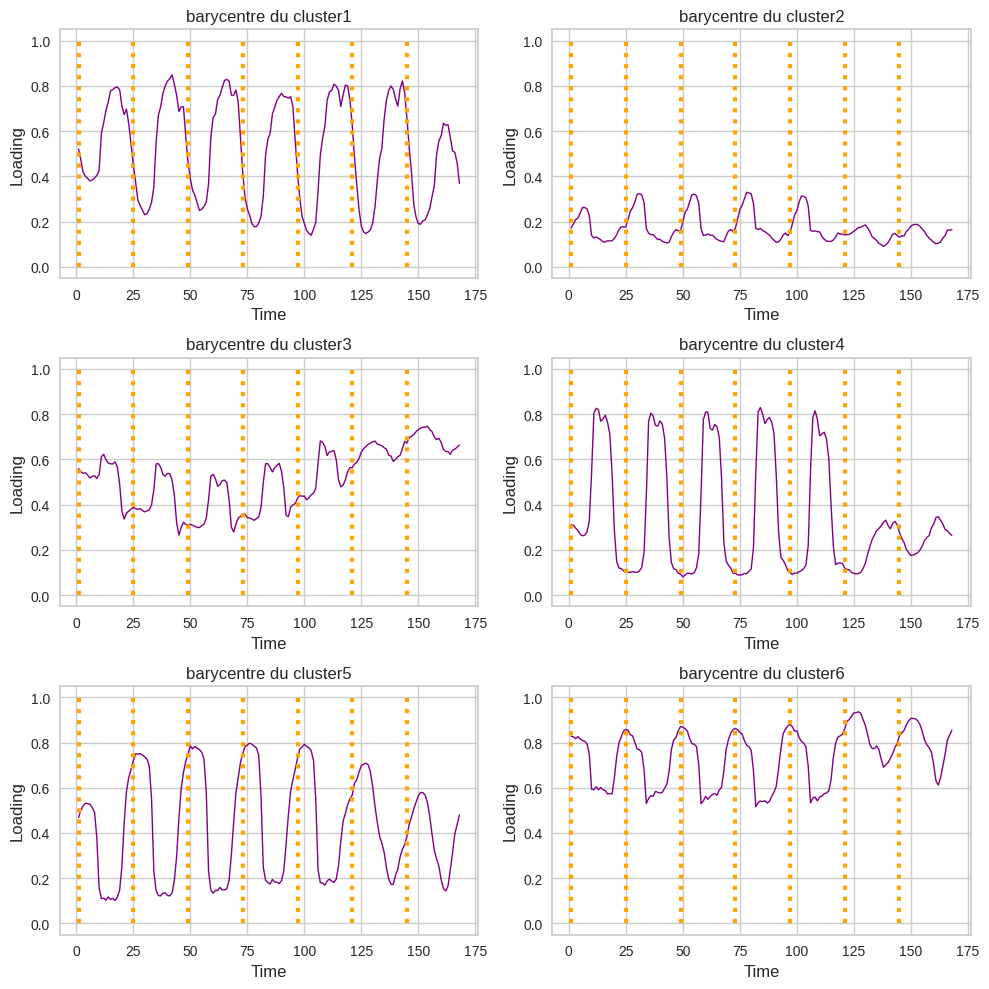

In [324]:
fig, axs = plt.subplots(3, 2, figsize = (10,10))
count=0
for i in range(3):
    for j in range(2):
        station = barycentres[count]
        axs[i,j].plot(time_range, station, linewidth = 1, color = 'purple')
        axs[i,j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i,j].set_title('barycentre du cluster'+ str(count+1), fontsize = 12)
        count=count+1
for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

En combinant la visualisation des clusters dans l'espace d'ACP et la représentation des barycentres de chaque clusters, on peut dire que le fait d'avoir augmenter le nombre de cluster apporte une certaine nuance dans le découpage. Ici: 
- Dans les clusters 1, 3 et 4 on retrouve les stations remplies pendant le jour  et vides la nuit:
    * Le cluster 1 correspond à un comportement moyen de ces stations
    * Le cluster 3 comprend les stations qui sont remplies le week-end aussi
    * Le cluster 4 regroupe les stations moins remplies le week-end
- Le cluster 2 rassemble les stations les plus vides 
- Le cluster 5 regroupe les stations vides le jour et remplies la nuit
- Le cluster 6 comporte les stations les plus remplies

Remarque: Faire une différence entre les clusters 1,3 et 4 est difficile car dans le plan d'ACP, ils sont difficilement séparables.


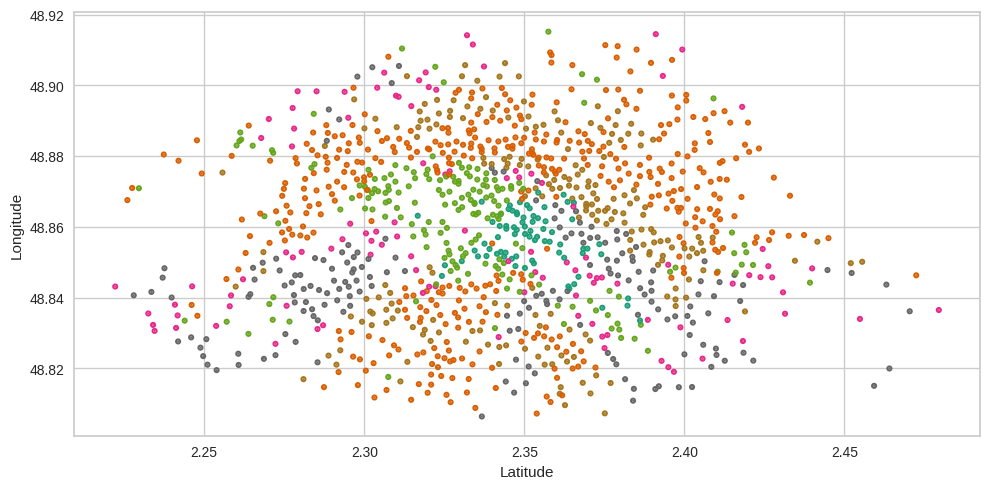

In [141]:
plt.scatter(coord.longitude, coord.latitude, s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()
plt.show()

En représentaant les sations sur une carte, on remarque que les comportements intuités lors de l'analyse descriptive sont prouvés par le clustering réalisé. En particulier, on retrouve que les stations du centre-ville sont remplies aux horaires actives et vides les moments de repos.actis 

#### Utilsation des données dans l'espace d'ACP

L'ACP nous a permis de concentrer la majorité de l'information de notre jeu de données sur 5 dimensions.
Nous allons donc faire une classification en ne nous appuyant que sur ces 5 dimensions.

In [76]:
loading_reduced = loading_pca[:,:5]

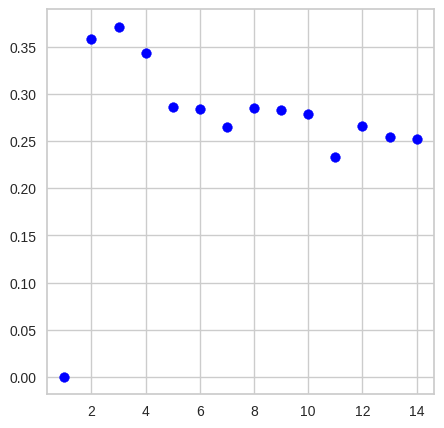

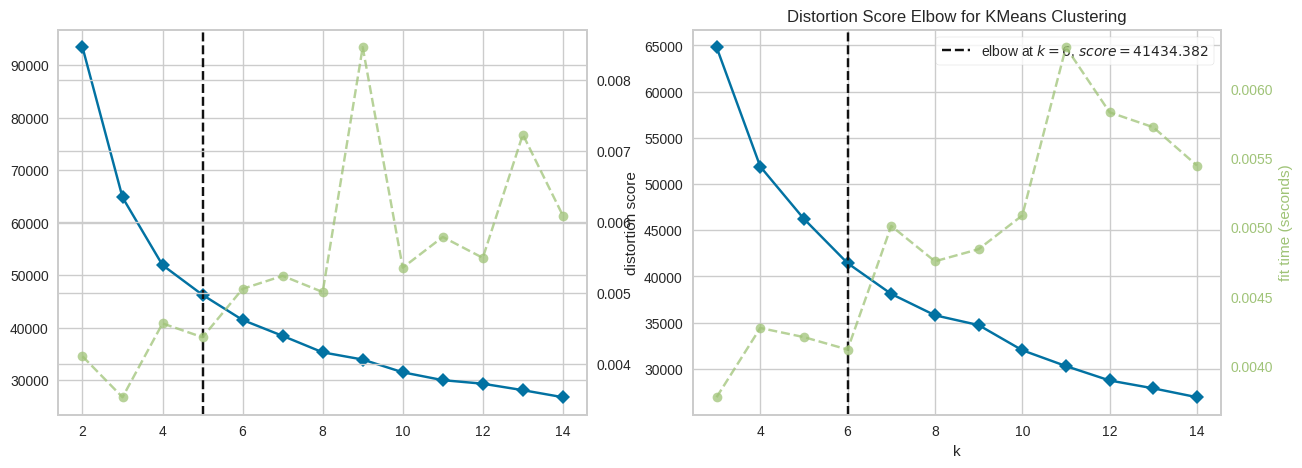

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
plt.figure(figsize = (5, 5))

k_max = 15

silhouette = []
for k in range(2, k_max):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto').
    clusters_kmeans = kmeans.fit_predict(loading_reduced)
    silhouette.append( silhouette_score(loading_reduced, clusters_kmeans, metric='euclidean') )
silhouette = np.array(silhouette)
plt.scatter(1,0, color="blue")
plt.scatter(range(2, k_max), silhouette, color="blue")
plt.show()
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
model = KMeans(init='k-means++', n_init='auto')
visualizer = KElbowVisualizer(model,k=(2,15))
visualizer.fit(loading_reduced)        
#visualizer.title('Initialisation à k=2')


plt.subplot(1,2,2)
model = KMeans(init='k-means++', n_init='auto')
visualizer = KElbowVisualizer(model,k=(3,15))

visualizer.fit(loading_reduced)
#visualizer.title('Initialisation à k=3')
visualizer.show() 

Comme dans le cas précédent, on remarque qu'en fonction de la métrique utilisée, le nombre de clusters optimal est soit 3,4 ou 6.
$$$$
Notre analyse se resteindra au cas k=6 qui nous permet d'avoir une segmentation plus fine.


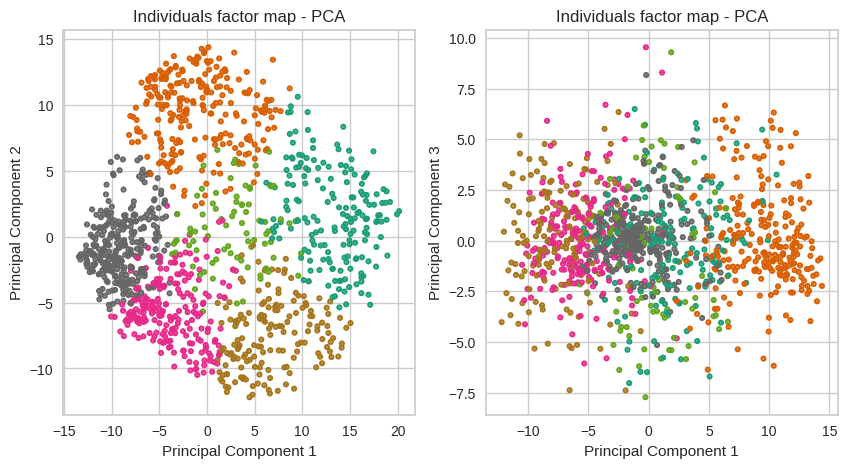

In [120]:
k=6

reskmeans_pca = KMeans(n_clusters=k,init='k-means++', n_init='auto', random_state=0)
C=reskmeans_pca.fit_predict(loading_reduced)
plt.subplot(1,2,1)
cmap = plt.get_cmap('Dark2',k)
plt.scatter(loading_pca[:, 0], loading_pca[:, 1], s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')





plt.subplot(1,2,2)
plt.scatter(loading_pca[:, 1], loading_pca[:, 4], s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

En utlisant les données traités avec l'ACP, on remarque que les clusters sont bien séparés dans le premier plan factoriel. Les regroupements sont:
- Les stations remplies à tout moment
- Les stations vides à tout moment
- Les stations qui ont plutôt un comportement moyen : qui ne sont ni remplis ni vides et ce, à n'importe quelle heure
- Les stations remplies pendant les horaires de travail
- Les stations plutôt remplies pendant les horaires de repos sont séparés en deux catégories: celles qui sont plus vides que la moyenne et celles qui sont plus remplies que la moyenne.

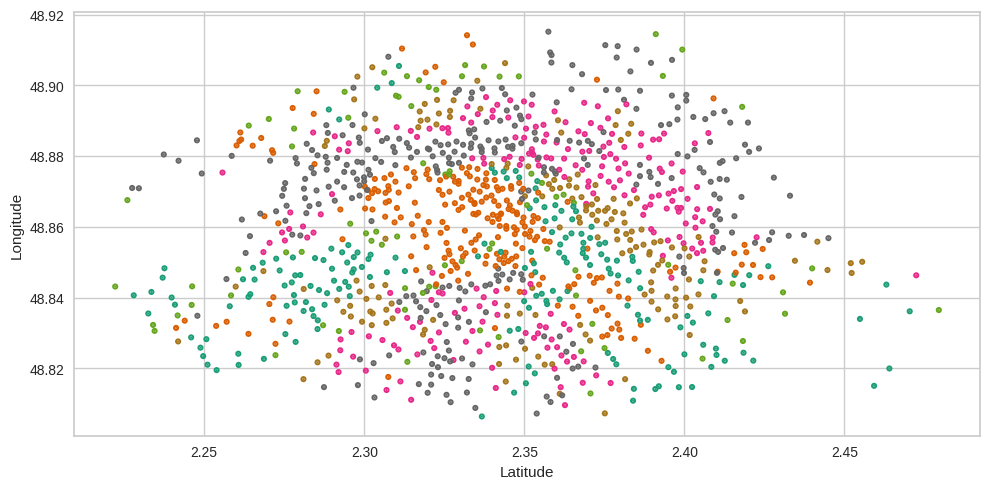

In [121]:
# plt.scatter(coord.longitude, coord.latitude, s=2, c = C,linewidths=3, alpha=1, cmap=cmap)
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.tight_layout()
# plt.show()

### Classification ascendante hiérachique (CAH)

CAH est une méthode clustering basée sur la distance entre les individus du jeu de données. L'un des principaux avantages de cet algorithme, c'est qu'il fournit une structure hiérachique qui permet une meilleure interprétation des relations entre les clusters. Elle permet aussi de pouvoir retrouver une séparation non linéaire entre les clusters. 


Nous allons utiliser la liaison ward car elle nous permet de choisir à chaque étape, le regroupement  qui implique la croissance minimale de l'inertie intraclasse. Les clusters formés ont l'avantage d'être compacts et homogènes.

In [123]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

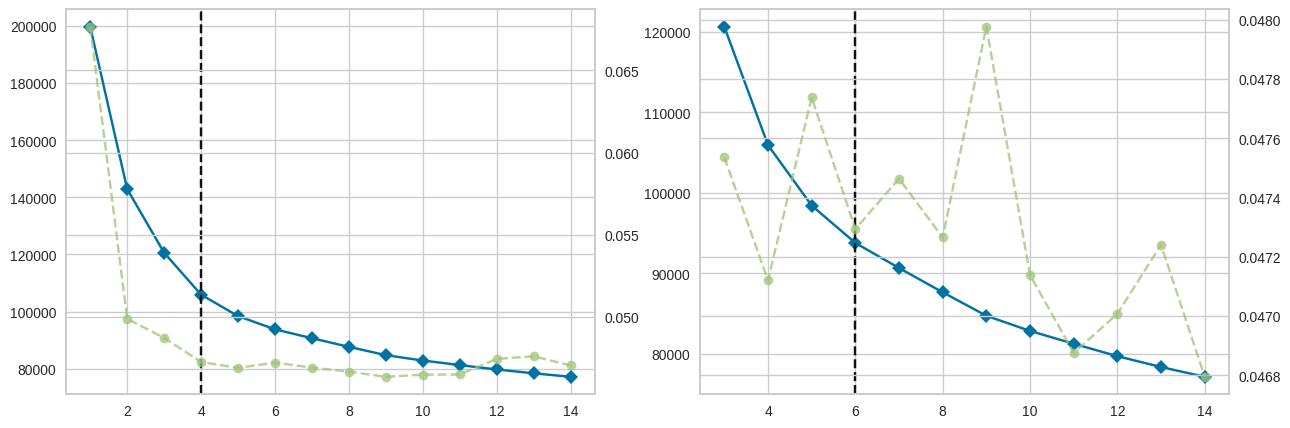

In [181]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
visualizer = KElbowVisualizer(ac, k=(1,15))
visualizer.fit(loading_scaled)  


plt.subplot(1,2,2)
visualizer = KElbowVisualizer(ac, k=(3,15))
visualizer.fit(loading_scaled)  
plt.show()



Nous pouvons donc choisir de prendre 4 ou 6 clusters pour faire la classification.

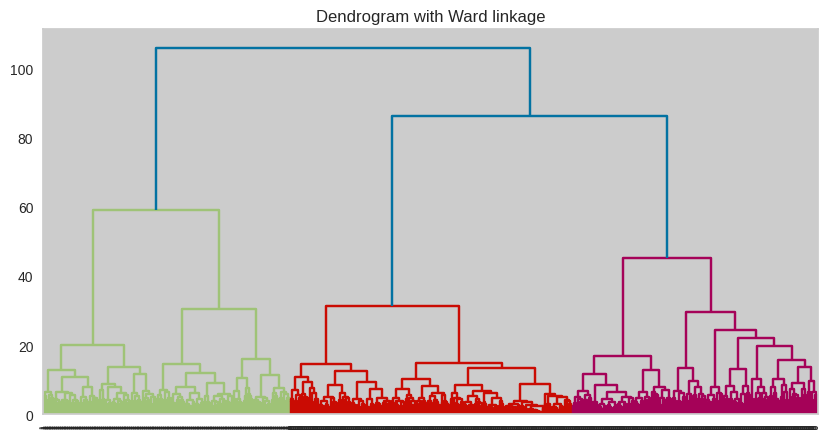

In [182]:

ac = AgglomerativeClustering( compute_distances=True, linkage='ward')
clusters = ac.fit(loading)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

plt.title("Dendrogram with Ward linkage")
plt.show()

On obtient une arborescence assez équilibrée. On remarque que les regrupements dans le dendogramme se font assez tôt. On peut donc dire qu'il y a une grande similarité entre les individus d'un meme cluster. Il y a un  saut significatif à l'étape k=6. On choisit de couper l'arbre à ce niveau.

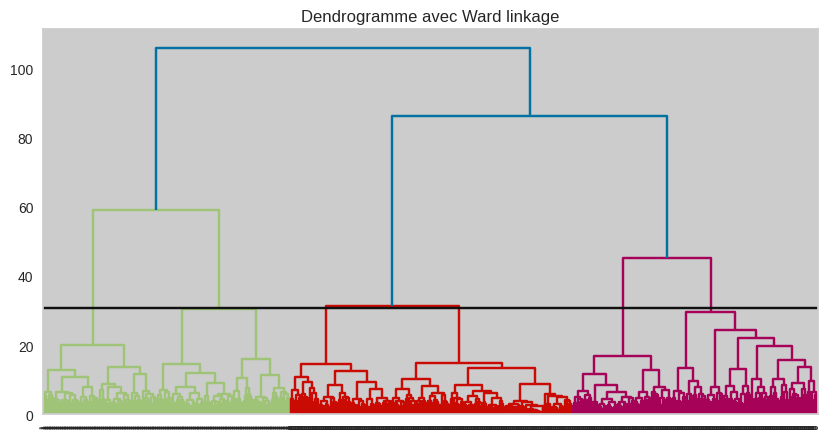

In [183]:
K = 6



sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')
plt.title("Dendrogramme avec Ward linkage")
plt.show()

[1 1 2 ... 5 2 2]


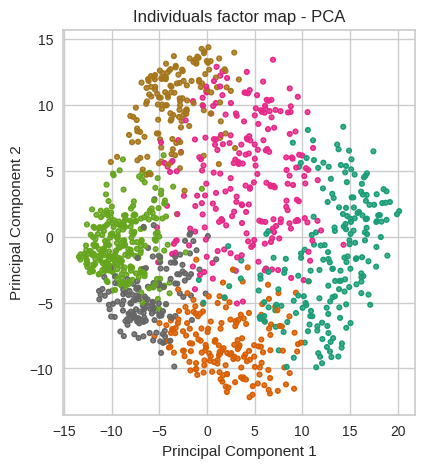

In [189]:
plt.subplot(1,2,1)
cmap = plt.get_cmap('Dark2',K)
ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(loading)
plt.scatter(loading_pca[:, 0], loading_pca[:, 1], s=2, c = clusters_ac,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

On obtient des classes assez séparées dans l'espace d'ACP. Même si tous les individus n'ont pas le même classement avec la méthode k-means, la position des classes dans l'espace montre que leur signification est semblable à celles obtenues avec K-means sans ACP

### GMM

Gaussian Mixture Models (GMM) est un algorithme de classification basée sur le fait que le jeu de données total est composé de plusieurs sous-groupes indépendants. Les individus au sein du même groupe sont distribués selon la même loi. 
Afin de sélectionner le bon modèle, nous allons minimiser le critère BIC.

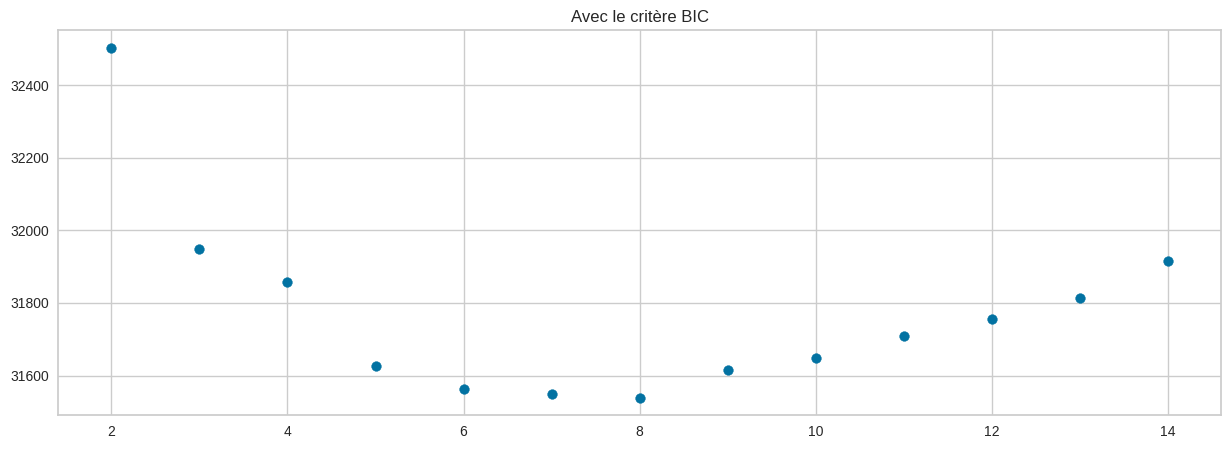

In [247]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 
k_max = 15
plt.figure(figsize = (15, 5))

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(loading_reduced)
    bic.append(gmm.bic(loading_reduced))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.title('Avec le critère BIC')

plt.show()


Le critère BIC indique que le nombre de clusters optimal est 7.

In [330]:
K=7
gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(loading_reduced)

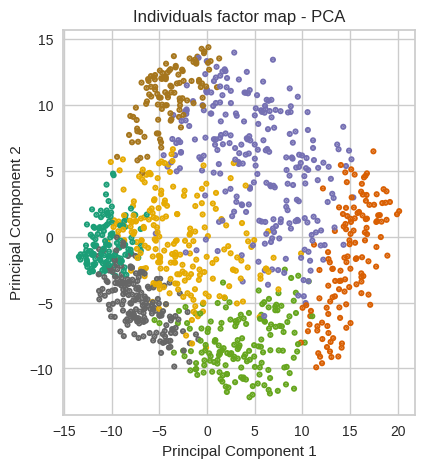

In [331]:
plt.subplot(1,2,1)
cmap = plt.get_cmap('Dark2',K)
plt.scatter(loading_pca[:, 0], loading_pca[:, 1], s=2, c = clusters_gmm,linewidths=3, alpha=1, cmap=cmap)
plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Ce clustering a permis de bien isoler les classes dans le plan d'ACP. La signification est la même que dans les cas précédents mais on remarque que l'isolation est meilleure.

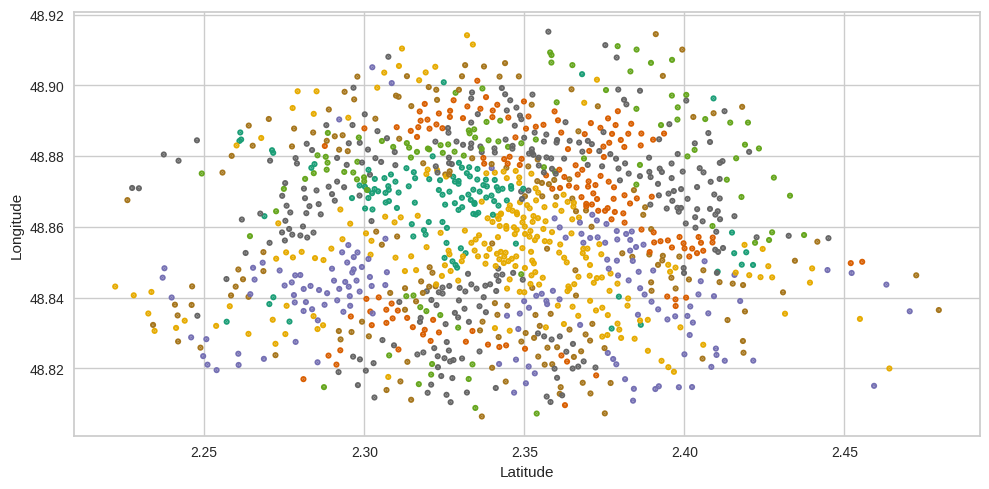

In [327]:
plt.scatter(coord.longitude, coord.latitude, s=2, c = clusters_gmm,linewidths=3, alpha=1, cmap=cmap)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()
plt.show()

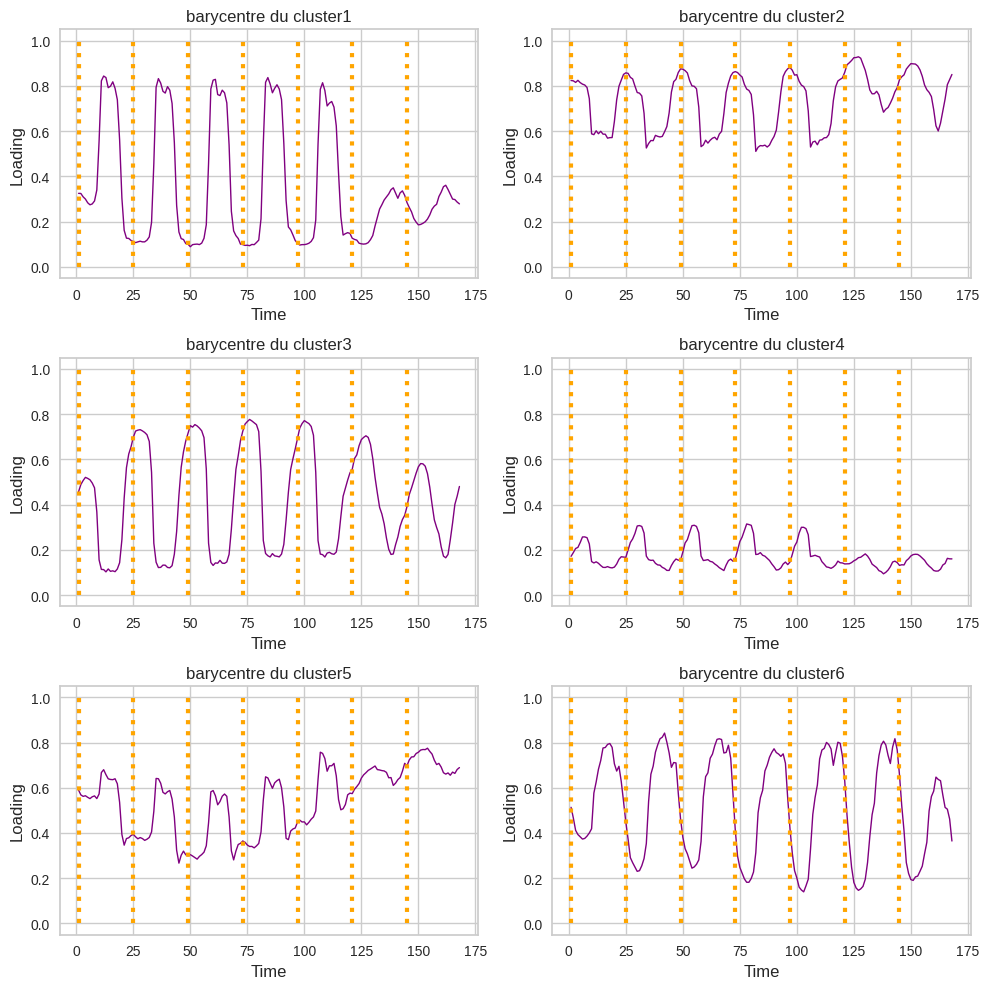

In [226]:
# barycentres=gmm.means_
# fig, axs = plt.subplots(3, 2, figsize = (10,10))
# count=0
# for i in range(3):
#     for j in range(2):
#         station = barycentres[count,:-1]
#         axs[i,j].plot(time_range, station, linewidth = 1, color = 'purple')
#         axs[i,j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
#         axs[i,j].set_title('barycentre du cluster'+ str(count+1), fontsize = 12)
#         count=count+1
# for ax in axs.flat:
#     ax.set_xlabel('Time', fontsize = 12)
#     ax.set_ylabel('Loading', fontsize = 12)
#     ax.tick_params(axis='x', labelsize=10)
#     ax.tick_params(axis='y', labelsize=10)
    
# plt.tight_layout()
# plt.show()

## Comparaisons GMM/ KMeans

In [ ]:
# Fonction a importer pour les matrices de confusion

def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters





Classes size: [717 463]
Class (in the classif1 numbering): [1 0]



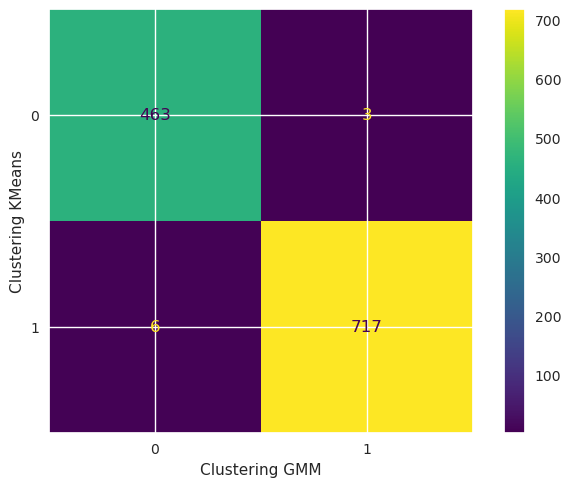

In [333]:
cm,clusters_pca_sorted=matchClasses(clusters_pca,clusters_gmm_2)
ConfusionMatrixDisplay(cm).plot()
plt.xlabel('Clustering GMM')
plt.ylabel('Clustering KMeans')
plt.show()

Avec deux classes on constate que les deux méthodes de clustering attribuent la meme classe aux memes points à l'exception de 9 points.


Classes size: [439 235 235 280]
Class (in the classif1 numbering): [0 3 2 1]



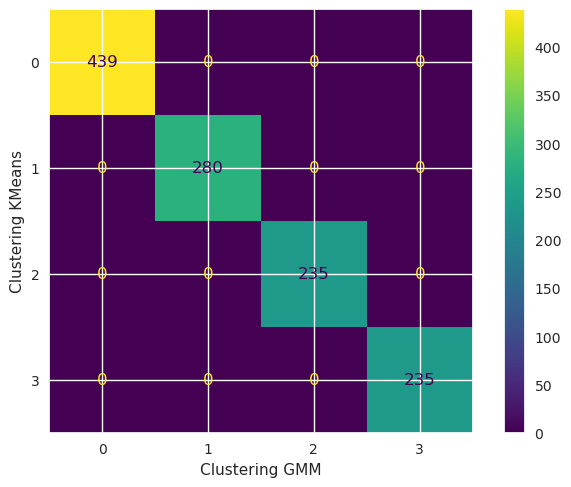

In [343]:
cm4,clusters_pca_sorted4=matchClasses(labels1_K4,clusters_gmm)
ConfusionMatrixDisplay(cm4).plot()
plt.xlabel('Clustering GMM')
plt.ylabel('Clustering KMeans')
plt.show()
